Ce notebook vise à analyser les données concernat les matchs, les joueurs, les terrains ainsi que les équipements de tennis 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df1 = pd.read_csv('Openchamps_men_nettoye.csv')
df1.drop(columns=['Unnamed: 0'], inplace=True)
df1.head()

Year       Champion  Seed_Champion Ctry_Champion         Runner-up  \
0  1969      Rod Laver              1           AUS     Andrés Gimeno   
1  1970    Arthur Ashe              4           USA       Dick Crealy   
2  1971   Ken Rosewall              2           AUS       Arthur Ashe   
3  1972   Ken Rosewall              2           AUS  Malcolm Anderson   
4  1973  John Newcombe              2           AUS        Onny Parun   

   Seed_Runner-up Ctry_Runner-up Score in the Final  Score1_Champion  \
0               9            ESP      6–3, 6–4, 7–5                6   
1              12            AUS      6–4, 9–7, 6–2                6   
2               3            USA      6–1, 7–5, 6–3                6   
3               8            AUS      7–6, 6–3, 7–5                7   
4              12            NZL      6–3, 6–7, 7–5                6   

   Score2_Champion  Score3_Champion  Score1_Runner-up  Score2_Runner-up  \
0                6                7                 3                 4   
1                9                6                 4                 7   
2                7                6                 1                 5   
3                6                7                 6                 3   
4                6                7                 3                 7   

   Score3_Runner-up  
0                 5  
1                 2  
2                 3  
3                 5  
4                 5

In [4]:
df2 = pd.read_csv('Openchamps_women_nettoye.csv')
df2.drop(columns=['Unnamed: 0'], inplace=True)
df2.head()

Year        Champion  Seed_Champion Ctry_Champion         Runner-up  \
0  1969  Margaret Court              2           AUS  Billie Jean King   
1  1970  Margaret Court              1           AUS    Kerry Melville   
2  1971  Margaret Court              1           AUS  Evonne Goolagong   
3  1972   Virginia Wade              2           GBR  Evonne Goolagong   
4  1973  Margaret Court              1           AUS  Evonne Goolagong   

   Seed_Runner-up Ctry_Runner-up Score in the Final  Score1_Champion  \
0               1            USA           6–4, 6–1              6.0   
1               2            AUS           6–1, 6–3              6.0   
2               2            AUS           2–6, 7–6              2.0   
3               1            AUS           6–4, 6–4              6.0   
4               2            AUS           6–4, 7–5              6.0   

   Score2_Champion  Score1_Runner-up  Score2_Runner-up  
0              6.0               4.0               1.0  
1              6.0               1.0               3.0  
2              7.0               6.0               6.0  
3              6.0               4.0               4.0  
4              7.0               4.0               5.0

I.Analyse Champions 

1.Champion/year pour les hommes et les femmes 

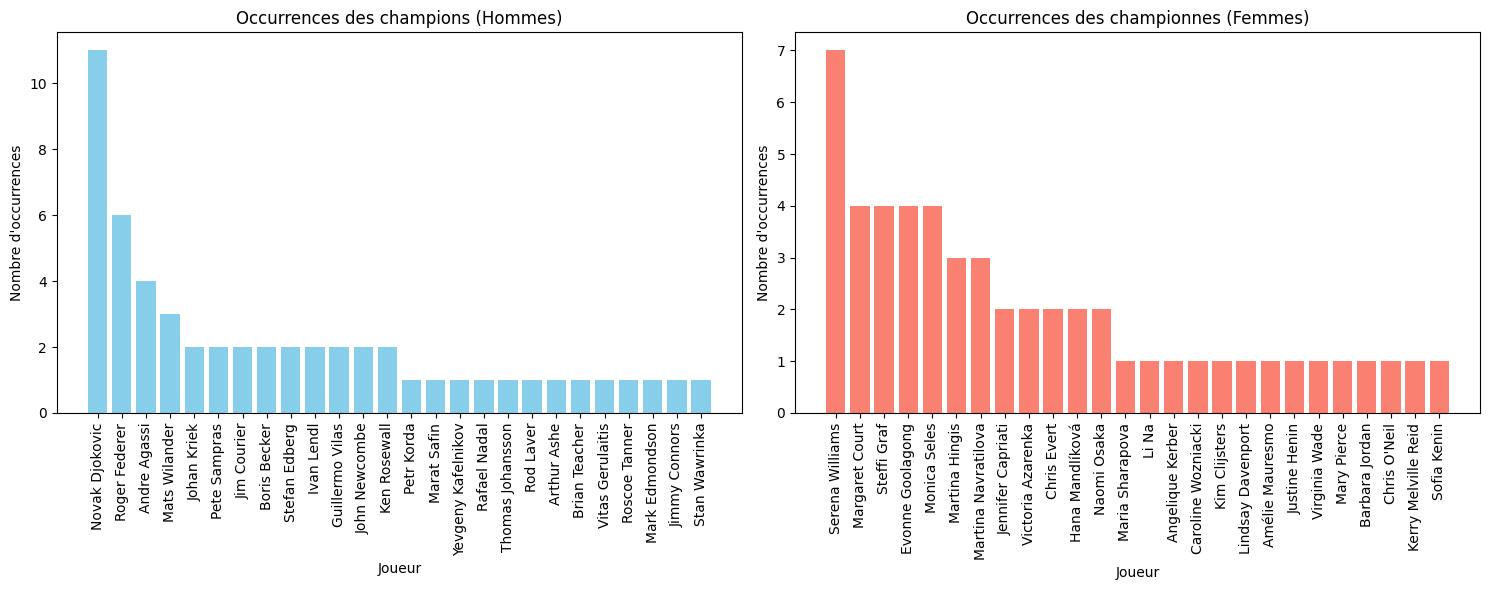

In [6]:
def plot_champion_occurrences(df1, df2):
    df_concat = pd.concat([df1, df2])
    champion_counts_male = df1['Champion'].value_counts()
    champion_counts_female = df2['Champion'].value_counts()
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    axs[0].bar(champion_counts_male.index, champion_counts_male.values, color='skyblue')
    axs[0].set_title('Occurrences des champions (Hommes)')
    axs[0].set_xlabel('Joueur')
    axs[0].set_ylabel('Nombre d\'occurrences')
    axs[0].tick_params(axis='x', rotation=90)

    axs[1].bar(champion_counts_female.index, champion_counts_female.values, color='salmon')
    axs[1].set_title('Occurrences des championnes (Femmes)')
    axs[1].set_xlabel('Joueur')
    axs[1].set_ylabel('Nombre d\'occurrences')
    axs[1].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
plot_champion_occurrences(df1, df2)

----------------------------------   CLASSEMENT   ---------------------------------

1. Dataset 'Openchamps' Classement des champions (hommes et femmes) 

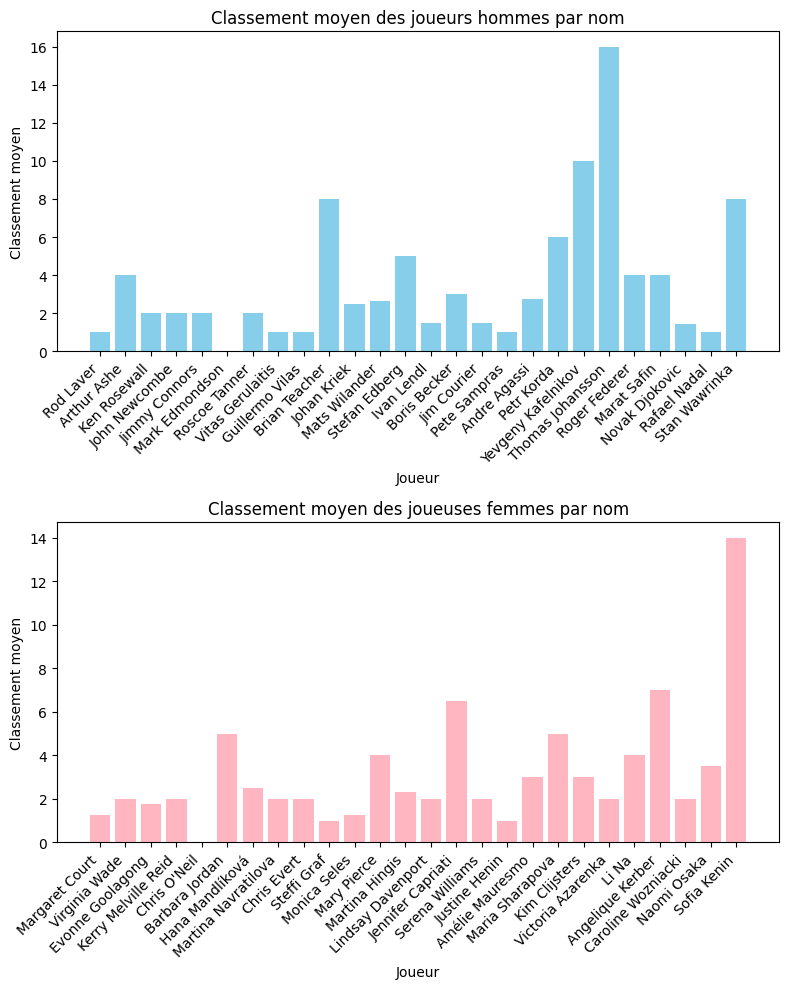

In [99]:
def plot_seed_ranking_by_player(df, title, color):
    seed_ranking_by_player = {}
    for player in df['Champion'].unique():
        seed_ranking = df[df['Champion'] == player]['Seed_Champion'].mean()  
        seed_ranking_by_player[player] = seed_ranking
    plt.bar(seed_ranking_by_player.keys(), seed_ranking_by_player.values(), color=color)
    plt.title(title)
    plt.xlabel('Joueur')
    plt.ylabel('Classement moyen')
    plt.xticks(rotation=45, ha='right')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
plt.sca(ax1)
plot_seed_ranking_by_player(df1, "Classement moyen des joueurs hommes par nom", color='skyblue')
plt.sca(ax2)
plot_seed_ranking_by_player(df2, "Classement moyen des joueuses femmes par nom", color='lightpink')
plt.tight_layout()

Affichage des noms des joueurs/joueuses champions qui sont classés en 1, 2, 3, 4, 5 

Affichage du nombre des joueurs selon le classement 

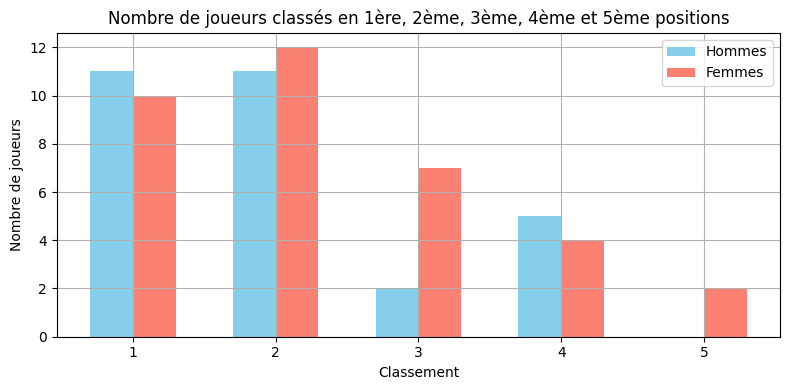

In [100]:
# Hommes
ranks_men = [1, 2, 3, 4, 5]
count_players_men = [len(df1[df1['Seed_Champion'] == rank]['Champion'].unique()) for rank in ranks_men]

# Femmes
ranks_women = [1, 2, 3, 4, 5]
count_players_women = [len(df2[df2['Seed_Champion'] == rank]['Champion'].unique()) for rank in ranks_women]
plt.figure(figsize=(8, 4))
plt.bar([rank - 0.15 for rank in ranks_men], count_players_men, width=0.3, label='Hommes', color='skyblue')
plt.bar([rank + 0.15 for rank in ranks_women], count_players_women, width=0.3, label='Femmes', color='salmon')
plt.title("Nombre de joueurs classés en 1ère, 2ème, 3ème, 4ème et 5ème positions")
plt.xlabel("Classement")
plt.ylabel("Nombre de joueurs")
plt.xticks(ranks_men)  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Affichage des noms des joueurs/joueurses selon le classement 

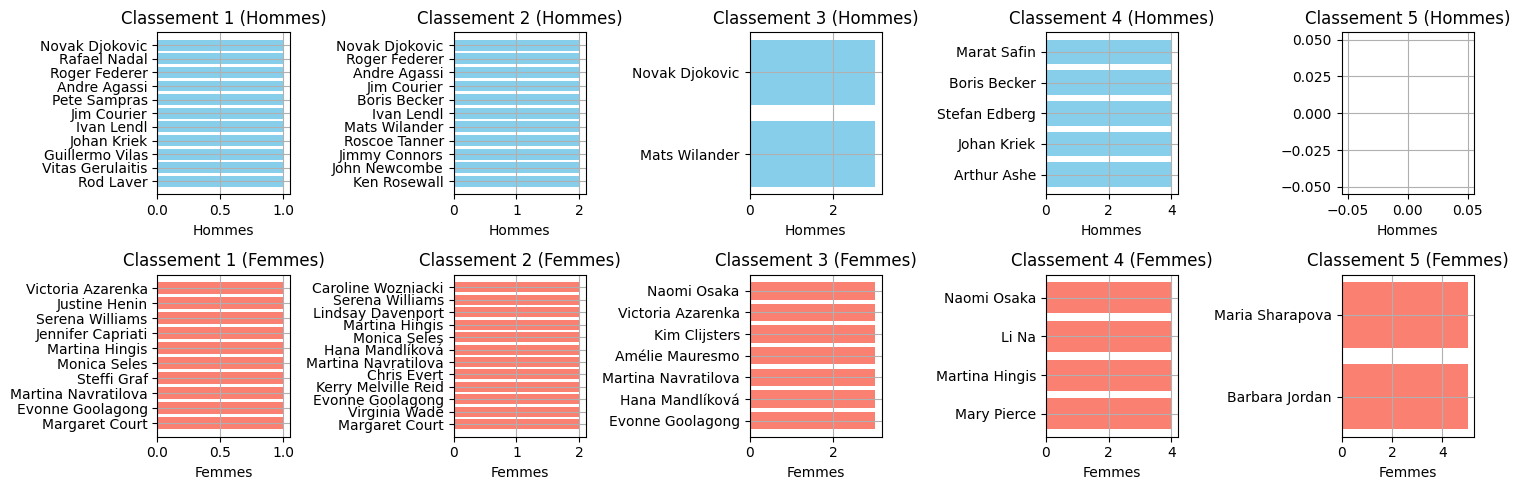

In [101]:
# Hommes
ranks_men = [1, 2, 3, 4, 5]
players_by_rank_men = [df1[df1['Seed_Champion'] == rank]['Champion'].unique() for rank in ranks_men]
# Femmes
ranks_women = [1, 2, 3, 4, 5]
players_by_rank_women = [df2[df2['Seed_Champion'] == rank]['Champion'].unique() for rank in ranks_women]
plt.figure(figsize=(15, 5))
for i, (rank, players) in enumerate(zip(ranks_men, players_by_rank_men), start=1):
    plt.subplot(2, 5, i)
    plt.barh(players, [rank] * len(players), color='skyblue')
    plt.title(f"Classement {rank} (Hommes)")
    plt.xlabel('Hommes')
    plt.grid(True)
for i, (rank, players) in enumerate(zip(ranks_women, players_by_rank_women), start=6):
    plt.subplot(2, 5, i)
    plt.barh(players, [rank] * len(players), color='salmon')
    plt.title(f"Classement {rank} (Femmes)")
    plt.xlabel('Femmes')
    plt.grid(True)
plt.tight_layout()
plt.show()

2. Dataset 'atpwta_Rank_nettoye' Joueurs/Ranking Classemnt actuel des joueurs 

In [14]:
df3 = pd.read_csv('atpwta_Rank_nettoye.csv')
df3

Player Name  Ranking   Ranking
0               Novak Djokovic      1.0       NaN
1                 Rafael Nadal      2.0       NaN
2                Roger Federer      3.0       NaN
3                Dominic Thiem      4.0       NaN
4              Daniil Medvedev      5.0       NaN
..                         ...      ...       ...
171               Astra Sharma      NaN      95.0
172  Anna Karolina Schmiedlova      NaN      96.0
173          Aleksandra Krunic      NaN      97.0
174      Natalia Vikhlyantseva      NaN      98.0
175        Beatriz Haddad Maia      NaN      99.0

[176 rows x 3 columns]

C:\Users\sonia\AppData\Local\Temp\ipykernel_6276\4185908911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men['Ranking'] = df_men['Ranking'].astype(int)
C:\Users\sonia\AppData\Local\Temp\ipykernel_6276\4185908911.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women[' Ranking'] = df_women[' Ranking'].astype(int)
C:\Users\sonia\AppData\Local\Temp\ipykernel_6276\4185908911.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

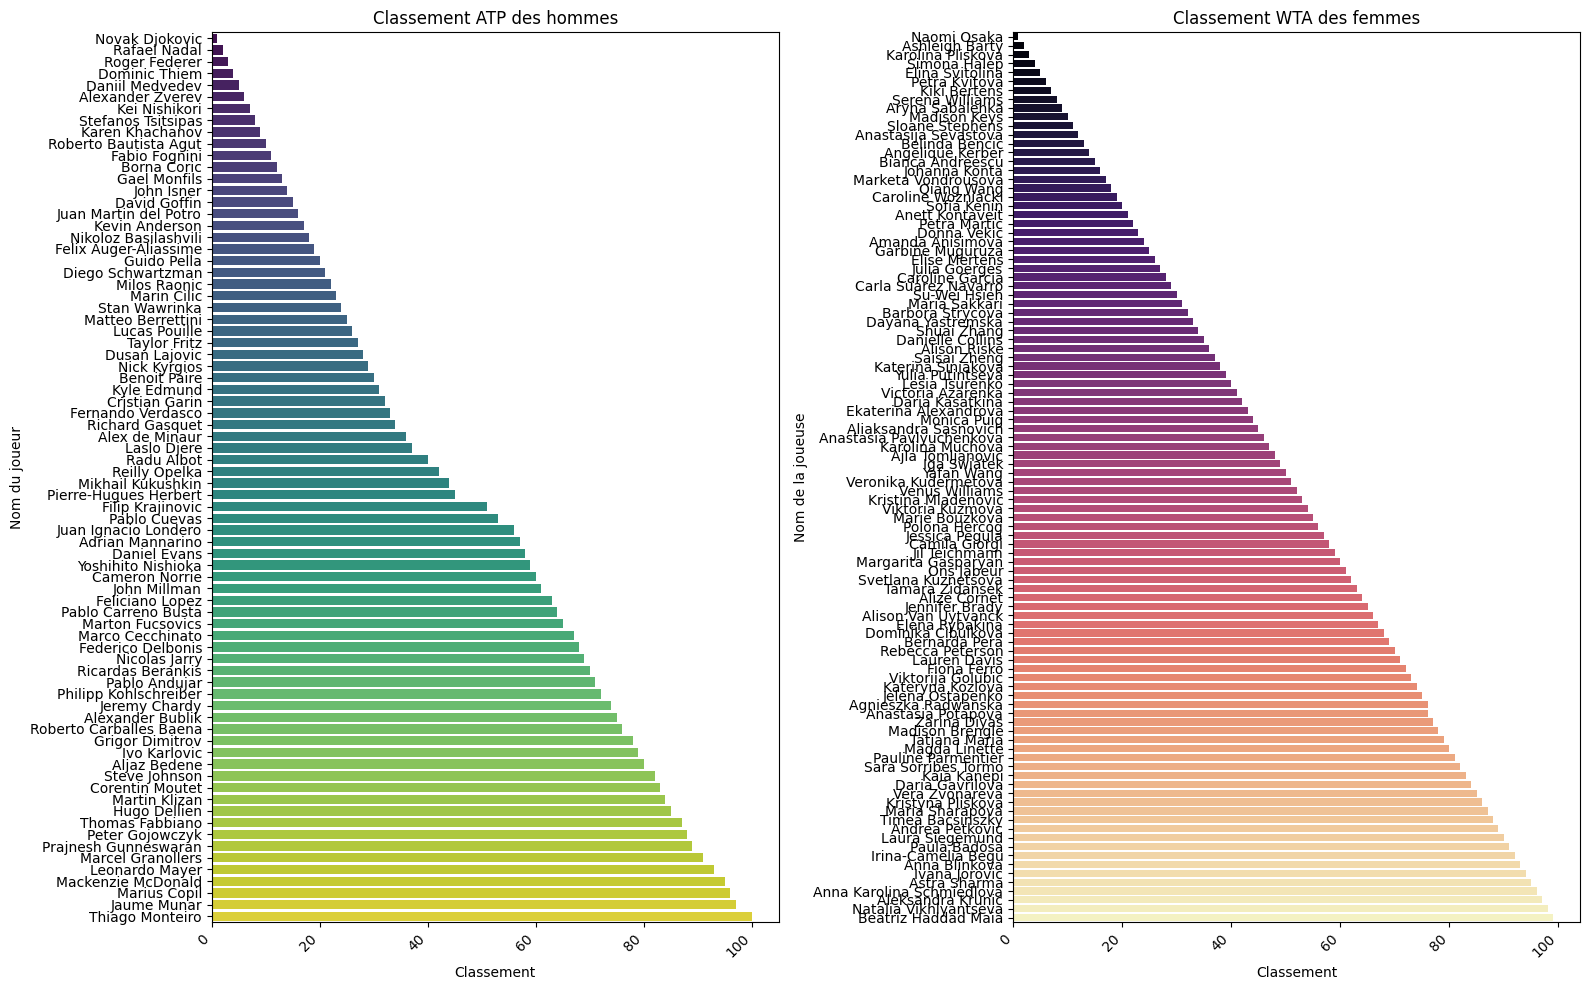

In [20]:
df_men = df3.dropna(subset=['Ranking'])
df_women = df3.dropna(subset=[' Ranking'])

df_men['Ranking'] = df_men['Ranking'].astype(int)
df_women[' Ranking'] = df_women[' Ranking'].astype(int)
plt.figure(figsize=(16, 10))
#graphe homme 
plt.subplot(1, 2, 1)
sns.barplot(y='Player Name', x='Ranking', data=df_men, palette='viridis')
plt.title('Classement ATP des hommes')
plt.xlabel('Classement')
plt.ylabel('Nom du joueur')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(left=0.25, bottom=0.25, right=0.95, top=0.95, wspace=0.5)
#graphe femmes
plt.subplot(1, 2, 2)
sns.barplot(y='Player Name', x=' Ranking', data=df_women, palette='magma')
plt.title('Classement WTA des femmes')
plt.xlabel('Classement')
plt.ylabel('Nom de la joueuse')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(left=0.25, bottom=0.25, right=0.95, top=0.95, wspace=0.5)
plt.tight_layout()
plt.show()

3. Dataset 'Classement2019_nettoye' Classement pays des joueuses/seed en 2019, SEED = Classement avant un tournoi

C:\Users\sonia\AppData\Local\Temp\ipykernel_6276\4073716741.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Seed', data=df4, palette='viridis')


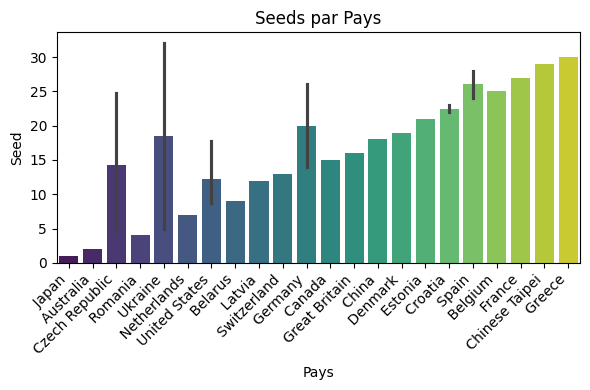

In [58]:
df4 = pd.read_excel('Classement2019_nettoye.xlsx')
plt.figure(figsize=(6, 4))
sns.barplot(x='Country', y='Seed', data=df4, palette='viridis')
plt.title('Seeds par Pays')
plt.xlabel('Pays')
plt.ylabel('Seed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4. Dataset 'GOATList_nettoye' Classement Joueurs/TotalPoints , tournamantsPoints, rankingPoints, bestEloRatingPoints, grandSlamPoints, performancePoints, titles, bigWinsPoints wonLost, wonPct

In [42]:
df5 = pd.read_csv('GOATList_nettoye.csv')
df5.head()

Unnamed: 0  rank            name   country_name country_id  active  \
0           0     1  Novak Djokovic         Serbia        SRB       1   
1           1     2   Roger Federer    Switzerland        SUI       0   
2           2     3    Rafael Nadal          Spain        ESP       0   
3           3     4   Jimmy Connors  United States        USA       0   
4           4     5      Ivan Lendl  United States        USA       0   

          dob  totalPoints  tournamentPoints  rankingPoints  ...  altFinals  \
0  1987-05-22         1102               595            241  ...          0   
1  1981-08-08          924               566            200  ...          0   
2  1986-06-03          885               526            186  ...          0   
3  1952-09-02          616               402            151  ...          2   
4  1960-03-07          604               395            141  ...          2   

   masters  olympics  bigTitles  titles  weeksAtNo1   wonLost  bestEloRating  \
0       40         0         71      98         404  1084-210           2629   
1       28         0         54     103         310  1245-275           2550   
2       36         1         59      92         209  1066-219           2552   
3       20         0         31     109         268  1275-285           2521   
4       18         0         33      94         270  1069-242           2518   

   bestEloRatingDate  wonPct  
0         2016-02-01   83.8%  
1         2007-03-05   81.9%  
2         2013-09-09   83.0%  
3         1978-10-29   81.7%  
4         1986-03-24   81.5%  

[5 rows x 42 columns]

#1. Name / TotalPoints         Name /tournamentPoints

C:\Users\sonia\AppData\Local\Temp\ipykernel_6276\3765725880.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='totalPoints', y='name', data=df5_total_sorted, palette='viridis', ax=ax1)
C:\Users\sonia\AppData\Local\Temp\ipykernel_6276\3765725880.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tournamentPoints', y='name', data=df5_tournament_sorted, palette='magma', ax=ax2)
C:\Users\sonia\AppData\Local\Temp\ipykernel_6276\3765725880.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rankingPoints', y='name', data=df5_ranking_s

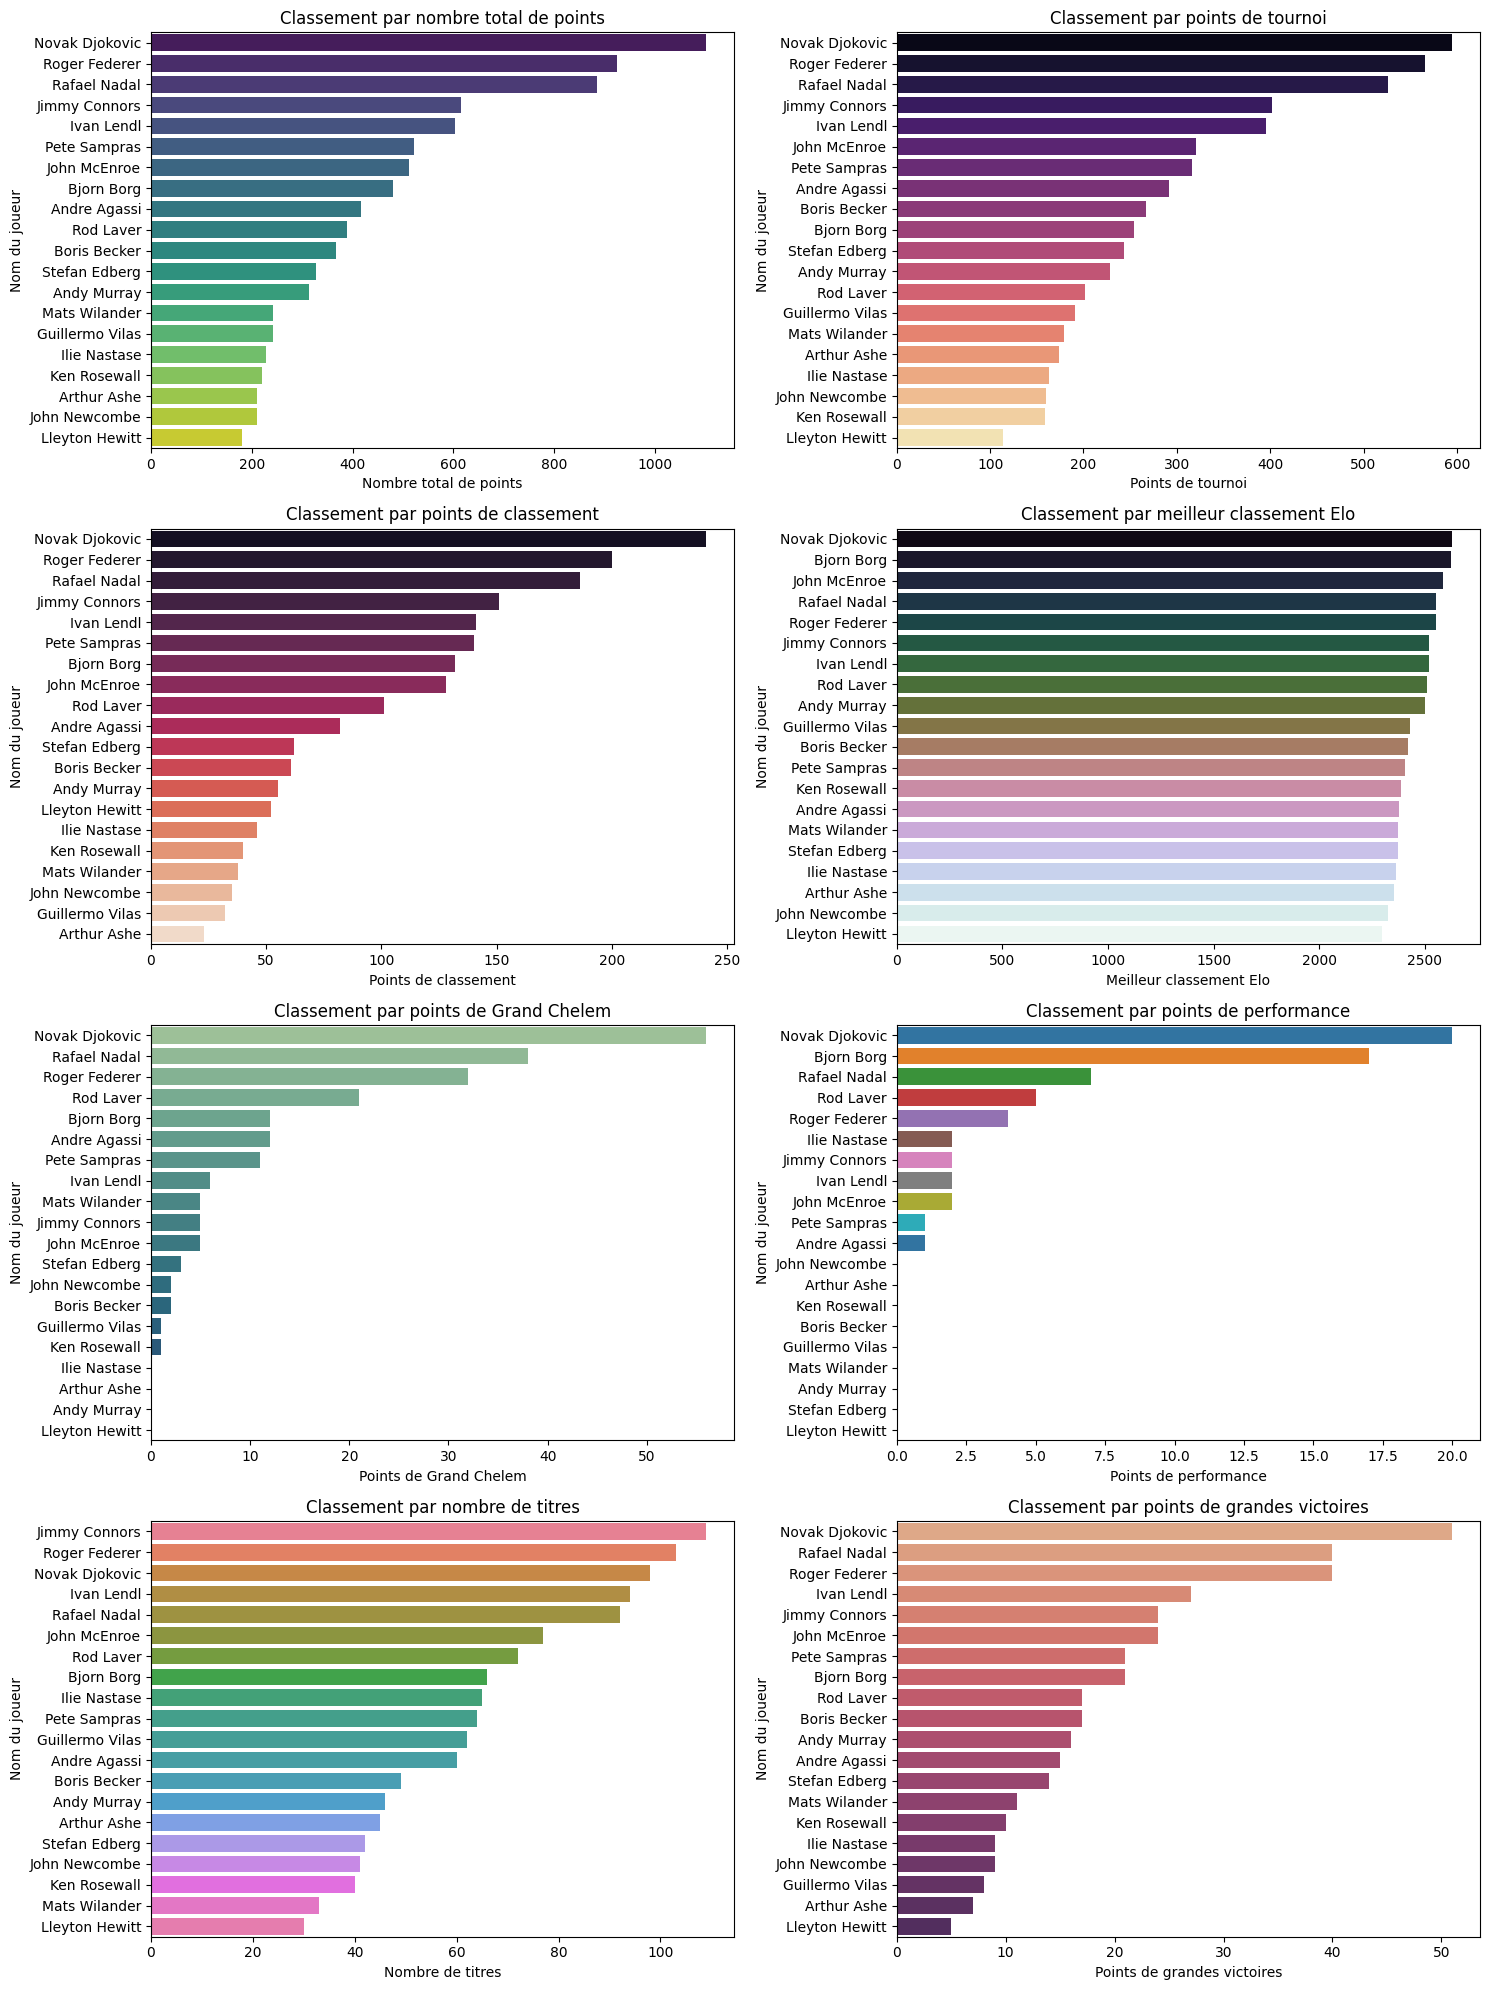

In [50]:
df5_grand_slam_sorted = df5.sort_values(by='grandSlamPoints', ascending=False)
df5_performance_sorted = df5.sort_values(by='performancePoints', ascending=False)
df5_titles_sorted = df5.sort_values(by='titles', ascending=False)
df5_big_wins_sorted = df5.sort_values(by='bigWinsPoints', ascending=False)
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(15, 20))

# Lz classement selon 'totalPoints'
sns.barplot(x='totalPoints', y='name', data=df5_total_sorted, palette='viridis', ax=ax1)
ax1.set_title('Classement par nombre total de points')
ax1.set_xlabel('Nombre total de points')
ax1.set_ylabel('Nom du joueur')

# Lz classement selon 'tournamentPoints'
sns.barplot(x='tournamentPoints', y='name', data=df5_tournament_sorted, palette='magma', ax=ax2)  
ax2.set_title('Classement par points de tournoi')
ax2.set_xlabel('Points de tournoi')
ax2.set_ylabel('Nom du joueur')

# Lz classement selon 'rankingPoints'
sns.barplot(x='rankingPoints', y='name', data=df5_ranking_sorted, palette='rocket', ax=ax3)
ax3.set_title('Classement par points de classement')
ax3.set_xlabel('Points de classement')
ax3.set_ylabel('Nom du joueur')

# Classement selon 'bestEloRating'
sns.barplot(x='bestEloRating', y='name', data=df5_bestelo_sorted, palette='cubehelix', ax=ax4)
ax4.set_title('Classement par meilleur classement Elo')
ax4.set_xlabel('Meilleur classement Elo')
ax4.set_ylabel('Nom du joueur')

# Classement selon 'grandSlamPoints'
sns.barplot(x='grandSlamPoints', y='name', data=df5_grand_slam_sorted, palette='crest', ax=ax5)
ax5.set_title('Classement par points de Grand Chelem')
ax5.set_xlabel('Points de Grand Chelem')
ax5.set_ylabel('Nom du joueur')

# Classment selon  leurs performancePoints
sns.barplot(x='performancePoints', y='name', data=df5_performance_sorted, palette='tab10', ax=ax6)
ax6.set_title('Classement par points de performance')
ax6.set_xlabel('Points de performance')
ax6.set_ylabel('Nom du joueur')

#Classement selon titres
sns.barplot(x='titles', y='name', data=df5_titles_sorted, palette='husl', ax=ax7)
ax7.set_title('Classement par nombre de titres')
ax7.set_xlabel('Nombre de titres')
ax7.set_ylabel('Nom du joueur')

#classement selon bigWinsPoints
sns.barplot(x='bigWinsPoints', y='name', data=df5_big_wins_sorted, palette='flare', ax=ax8)
ax8.set_title('Classement par points de grandes victoires')
ax8.set_xlabel('Points de grandes victoires')
ax8.set_ylabel('Nom du joueur')
plt.tight_layout()
plt.show()

----------------------------------------------------------------------- FIN CLASSEMENT ----------------------------------------------------------------------------------------

I. Les pays 

1. Dataset 'Openchamps'       Nombre de joueurs selon leurs 


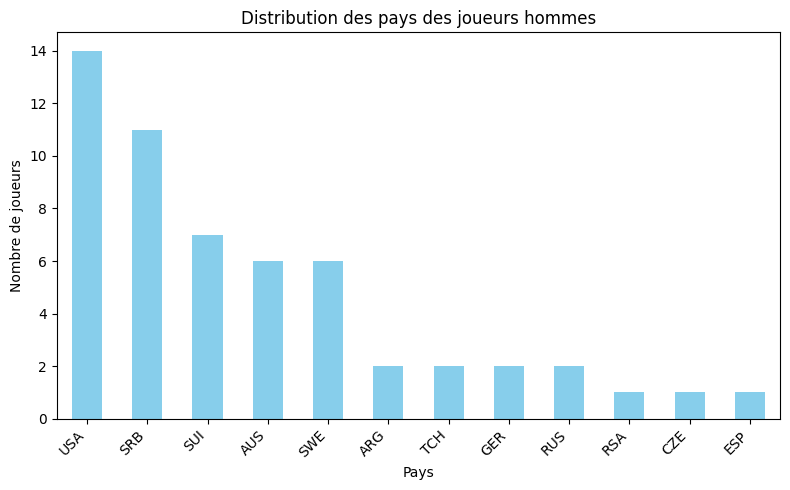

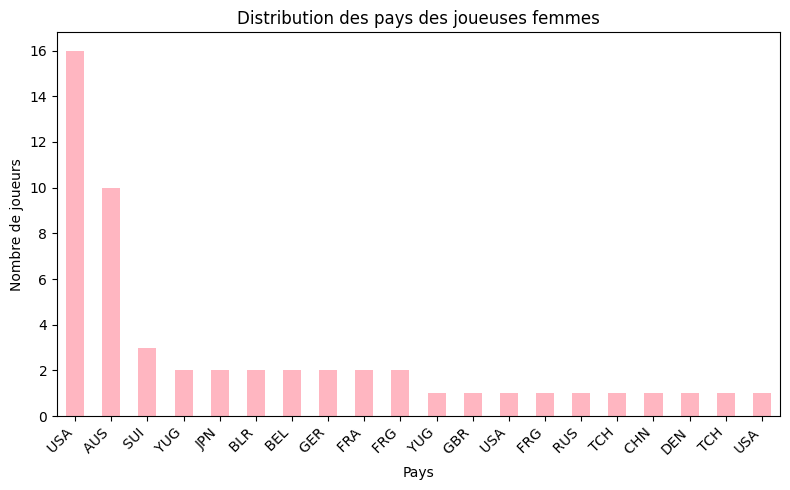

In [102]:
def plot_country_distribution(df, title, color):
    country_counts = df['Ctry_Champion'].value_counts()
    plt.figure(figsize=(8, 5))
    country_counts.plot(kind='bar', color=color)
    plt.title(title)
    plt.xlabel('Pays')
    plt.ylabel('Nombre de joueurs')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
plot_country_distribution(df1, "Distribution des pays des joueurs hommes", color='skyblue')
plot_country_distribution(df2, "Distribution des pays des joueuses femmes", color='lightpink')

2. Dataset 'KaggleMatches_cleaned' Pays 

In [59]:
df6 = pd.read_csv('KaggleMatches_cleaned.csv')
df6.head()

C:\Users\sonia\AppData\Local\Temp\ipykernel_6276\3032705956.py:1: DtypeWarning: Columns (3,8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df6 = pd.read_csv('KaggleMatches_cleaned.csv')


tourney_id tourney_name surface draw_size tourney_level tourney_date  \
0  2019-M020     Brisbane    Hard        32             A   2018-12-31   
1  2019-M020     Brisbane    Hard        32             A   2018-12-31   
2  2019-M020     Brisbane    Hard        32             A   2018-12-31   
3  2019-M020     Brisbane    Hard        32             A   2018-12-31   
4  2019-M020     Brisbane    Hard        32             A   2018-12-31   

   match_num  winner_id winner_seed winner_entry  ... l_1stWon l_2ndWon  \
0        300     105453         2.0            0  ...     34.0     20.0   
1        299     106421         4.0            0  ...     36.0      7.0   
2        298     105453         2.0            0  ...     15.0      6.0   
3        297     104542           0           PR  ...     38.0      9.0   
4        296     106421         4.0            0  ...     46.0     19.0   

   l_SvGms l_bpSaved  l_bpFaced  winner_rank winner_rank_points loser_rank  \
0     14.0      10.0       15.0          9.0             3590.0       16.0   
1     10.0      10.0       13.0         16.0             1977.0      239.0   
2      8.0       1.0        5.0          9.0             3590.0       40.0   
3     11.0       4.0        6.0        239.0              200.0       31.0   
4     15.0       2.0        4.0         16.0             1977.0       18.0   

  loser_rank_points league  
0            1977.0    atp  
1             200.0    atp  
2            1050.0    atp  
3            1298.0    atp  
4            1855.0    atp  

[5 rows x 50 columns]

4.Champion / Score1(2,3)_Champion

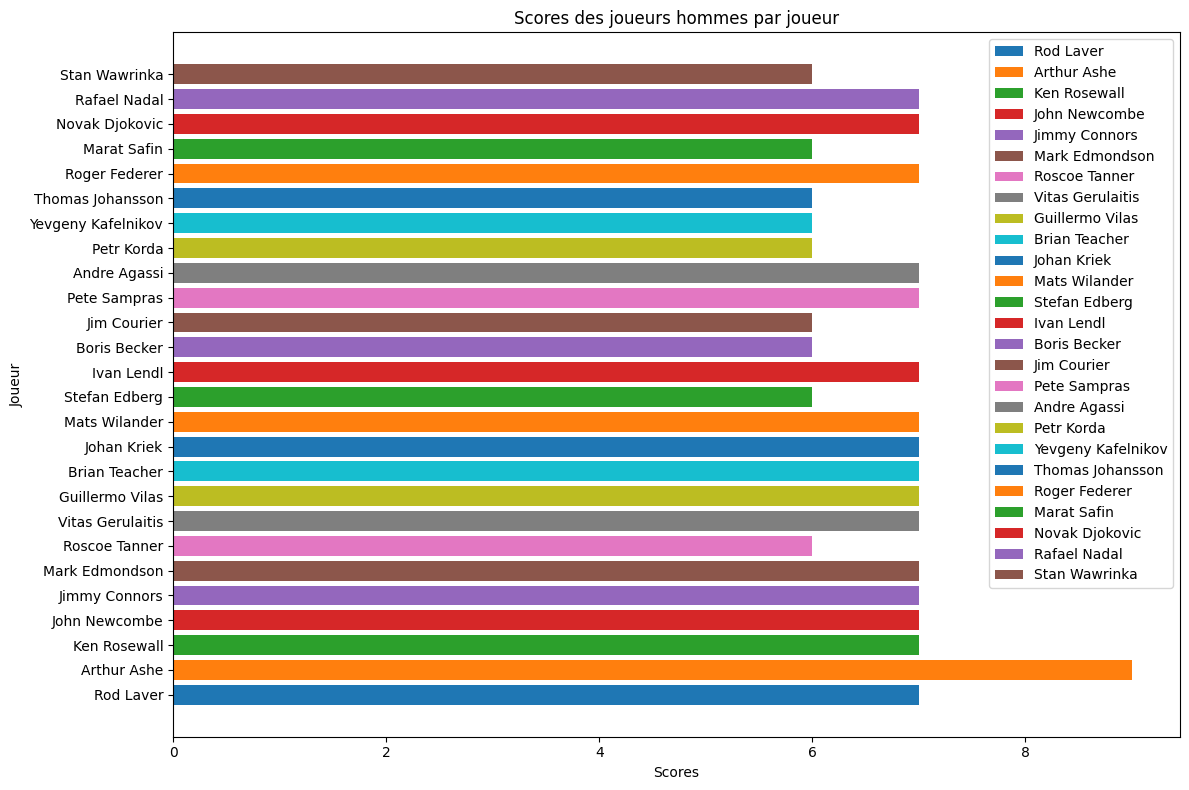

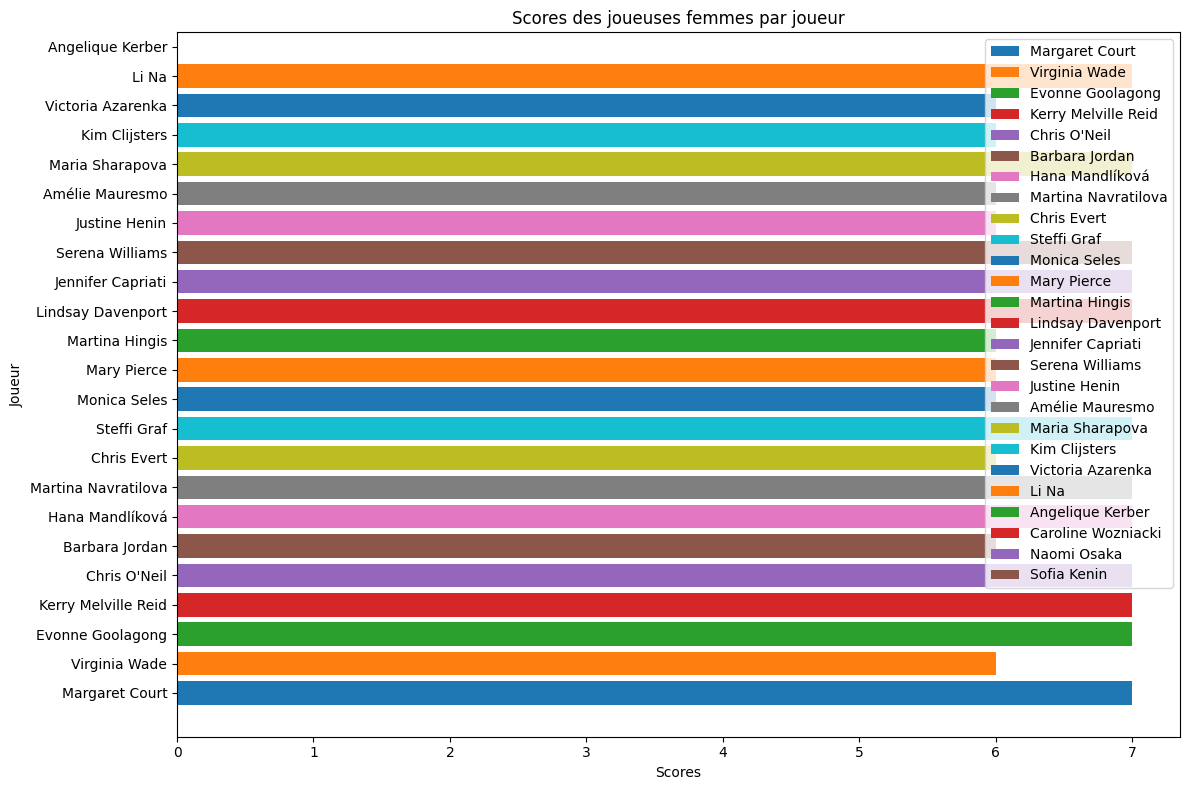

In [103]:
def plot_scores(df, title):
    score_columns = ['Score1_Champion', 'Score2_Champion', 'Score3_Champion'] if 'Score3_Champion' in df.columns else ['Score1_Champion', 'Score2_Champion']
    player_scores = [(player, df[df['Champion'] == player][score_columns].values.flatten()) for player in df['Champion'].unique()]
    plt.figure(figsize=(12, 8))
    for player, scores in player_scores:
        plt.barh(player, scores, label=player)
    plt.title(title)
    plt.xlabel('Scores')
    plt.ylabel('Joueur')
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_scores(df1, "Scores des joueurs hommes par joueur")
plot_scores(df2, "Scores des joueuses femmes par joueur")

--------------------------------------------------------------------Champion Fin ---------------------------------------------------------------

II.Analyse Runner-Up = Finalistes hommes et femmes 


1.Runner-Up / Occurences par années 

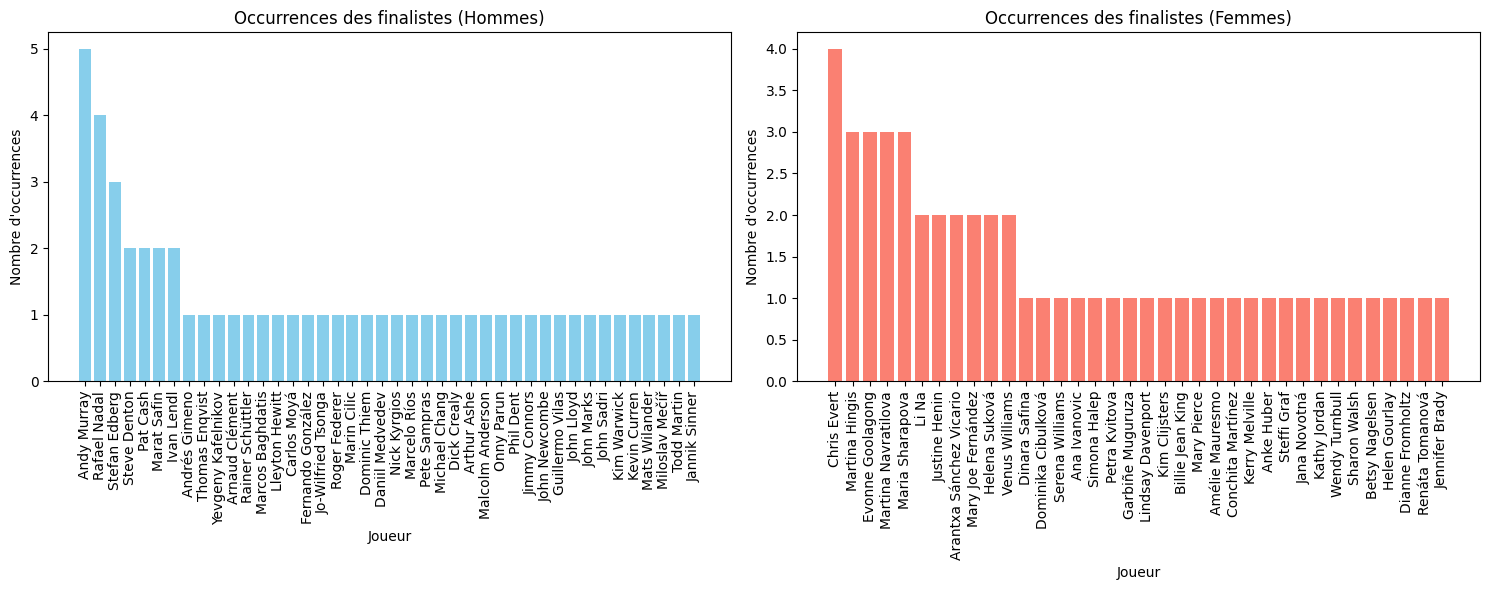

In [104]:
def plot_runner_up_occurrences(df1, df2):
    df_concat = pd.concat([df1, df2])
    runner_up_counts_male = df1['Runner-up'].value_counts()
    runner_up_counts_female = df2['Runner-up'].value_counts()
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    axs[0].bar(runner_up_counts_male.index, runner_up_counts_male.values, color='skyblue')
    axs[0].set_title('Occurrences des finalistes (Hommes)')
    axs[0].set_xlabel('Joueur')
    axs[0].set_ylabel('Nombre d\'occurrences')
    axs[0].tick_params(axis='x', rotation=90)

    axs[1].bar(runner_up_counts_female.index, runner_up_counts_female.values, color='salmon')
    axs[1].set_title('Occurrences des finalistes (Femmes)')
    axs[1].set_xlabel('Joueur')
    axs[1].set_ylabel('Nombre d\'occurrences')
    axs[1].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
plot_runner_up_occurrences(df1, df2)

------------------------------------------------------------------------  Classement ------------------------------------------------------------------------------------------------

1.Runner-up /Seed_Runner-up_ = classements général des finalistes 

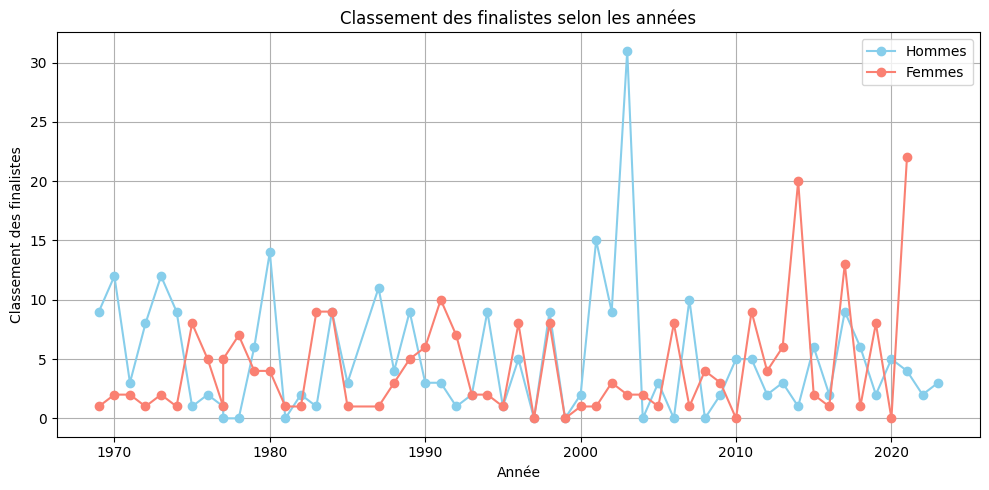

In [105]:
def plot_seed_ranking(df1, df2):
    plt.figure(figsize=(10, 5))
    plt.plot(df1['Year'], df1['Seed_Runner-up'], marker='o', linestyle='-', color='skyblue', label='Hommes')
    plt.plot(df2['Year'], df2['Seed_Runner-up'], marker='o', linestyle='-', color='salmon', label='Femmes')
    plt.title('Classement des finalistes selon les années')
    plt.xlabel('Année')
    plt.ylabel('Classement des finalistes')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_seed_ranking(df1, df2)

2.Nombre de joueurs/joueuses finalistes par le classement

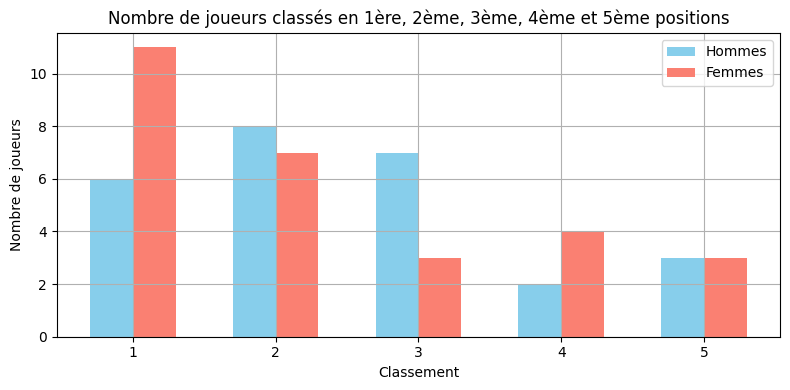

In [106]:
# Hommes
ranks_men = [1, 2, 3, 4, 5]
count_players_men = [len(df1[df1['Seed_Runner-up'] == rank]['Runner-up'].unique()) for rank in ranks_men]

# Femmes
ranks_women = [1, 2, 3, 4, 5]
count_players_women = [len(df2[df2['Seed_Runner-up'] == rank]['Runner-up'].unique()) for rank in ranks_women]
plt.figure(figsize=(8, 4))
plt.bar([rank - 0.15 for rank in ranks_men], count_players_men, width=0.3, label='Hommes', color='skyblue')
plt.bar([rank + 0.15 for rank in ranks_women], count_players_women, width=0.3, label='Femmes', color='salmon')
plt.title("Nombre de joueurs classés en 1ère, 2ème, 3ème, 4ème et 5ème positions")
plt.xlabel("Classement")
plt.ylabel("Nombre de joueurs")
plt.xticks(ranks_men)  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

3.Noms des finalistes selon leurs classements 

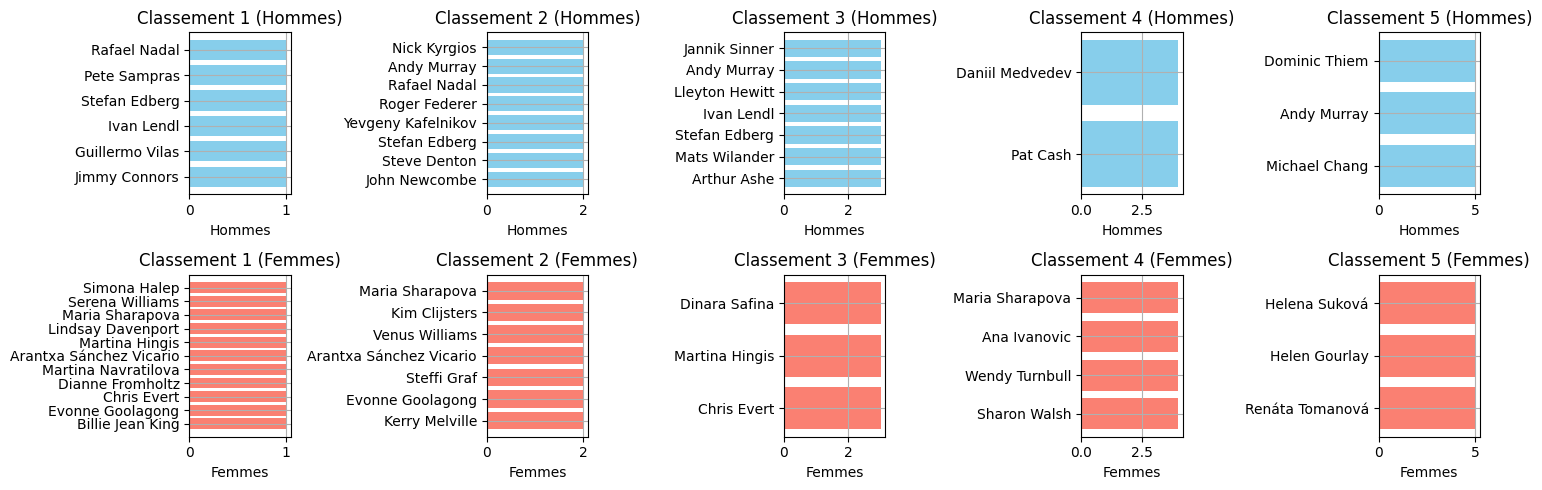

In [107]:
# Hommes
ranks_men = [1, 2, 3, 4, 5]
players_by_rank_men = [df1[df1['Seed_Runner-up'] == rank]['Runner-up'].unique() for rank in ranks_men]
# Femmes
ranks_women = [1, 2, 3, 4, 5]
players_by_rank_women = [df2[df2['Seed_Runner-up'] == rank]['Runner-up'].unique() for rank in ranks_women]
plt.figure(figsize=(15, 5))
for i, (rank, players) in enumerate(zip(ranks_men, players_by_rank_men), start=1):
    plt.subplot(2, 5, i)
    plt.barh(players, [rank] * len(players), color='skyblue')
    plt.title(f"Classement {rank} (Hommes)")
    plt.xlabel('Hommes')
    plt.grid(True)
for i, (rank, players) in enumerate(zip(ranks_women, players_by_rank_women), start=6):
    plt.subplot(2, 5, i)
    plt.barh(players, [rank] * len(players), color='salmon')
    plt.title(f"Classement {rank} (Femmes)")
    plt.xlabel('Femmes')
    plt.grid(True)
plt.tight_layout()
plt.show()

--------------------------------------------------------------------------- Fin Classement---------------------------- -------------------------------------------------------------------------------

Runner-up / country

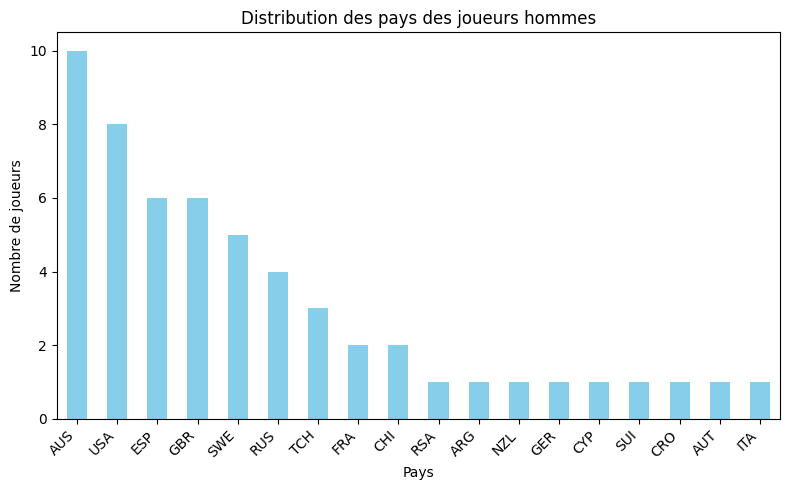

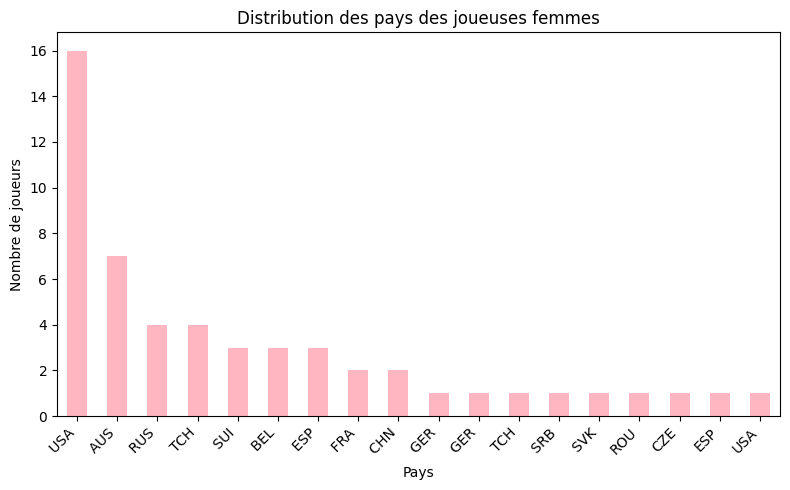

In [108]:
def plot_countryrunnerup_distribution(df, title, color):
    country_counts = df['Ctry_Runner-up'].value_counts()
    plt.figure(figsize=(8, 5))
    country_counts.plot(kind='bar', color=color)
    plt.title(title)
    plt.xlabel('Pays')
    plt.ylabel('Nombre de joueurs')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
plot_countryrunnerup_distribution(df1, "Distribution des pays des joueurs hommes", color='skyblue')
plot_countryrunnerup_distribution(df2, "Distribution des pays des joueuses femmes", color='lightpink')

Runner-up / Scores 

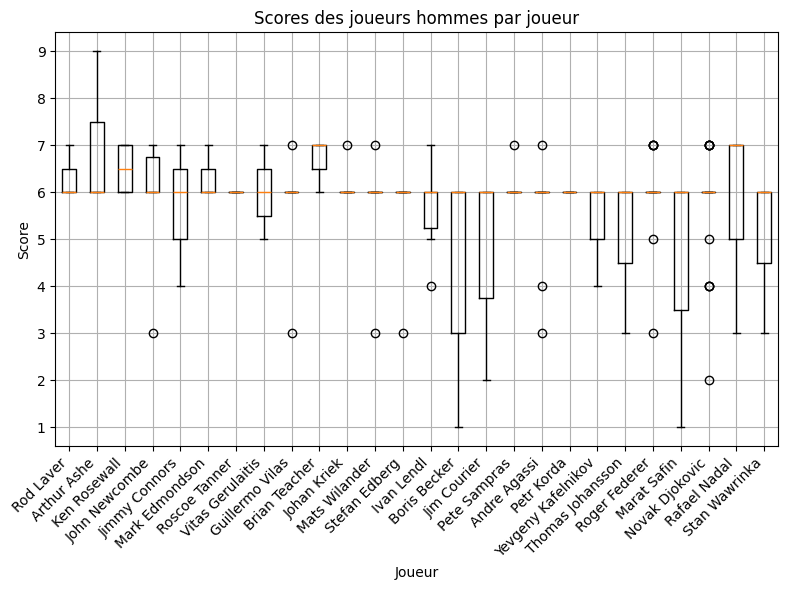

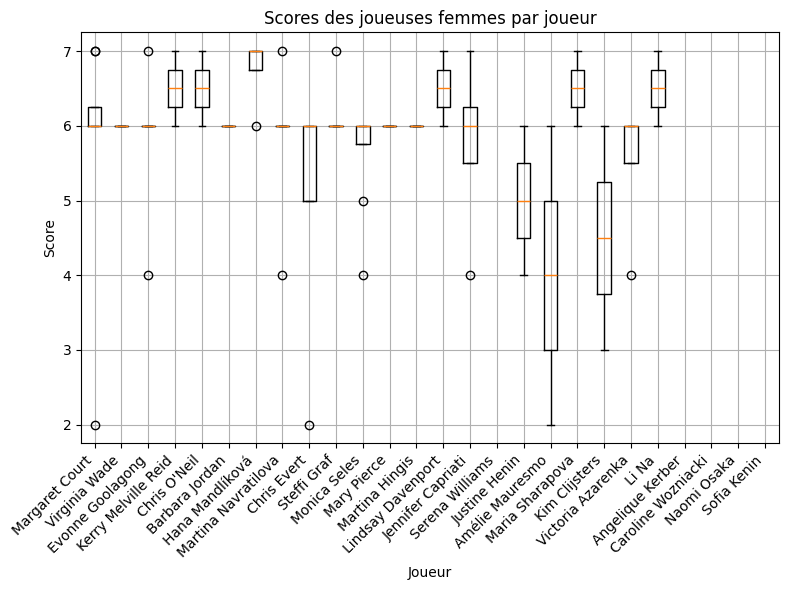

In [109]:
def plot_scores_boxplot(df, title):
    score_columns = ['Score1_Champion', 'Score2_Champion']
    if 'Score3_Champion' in df.columns:
        score_columns.append('Score3_Champion')
    player_scores = [df[df['Champion'] == player][score_columns].values.flatten() for player in df['Champion'].unique()]
    
    plt.figure(figsize=(8, 6))
    plt.boxplot(player_scores, labels=df['Champion'].unique())
    plt.title(title)
    plt.xlabel('Joueur')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')  
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_scores_boxplot(df1, "Scores des joueurs hommes par joueur")
plot_scores_boxplot(df2, "Scores des joueuses femmes par joueur")

----------------------------------------------------------------------------------------------------------------------------------------------------------------------

III.Comparaison entre le classement d'un champion et celui d'un finaliste 

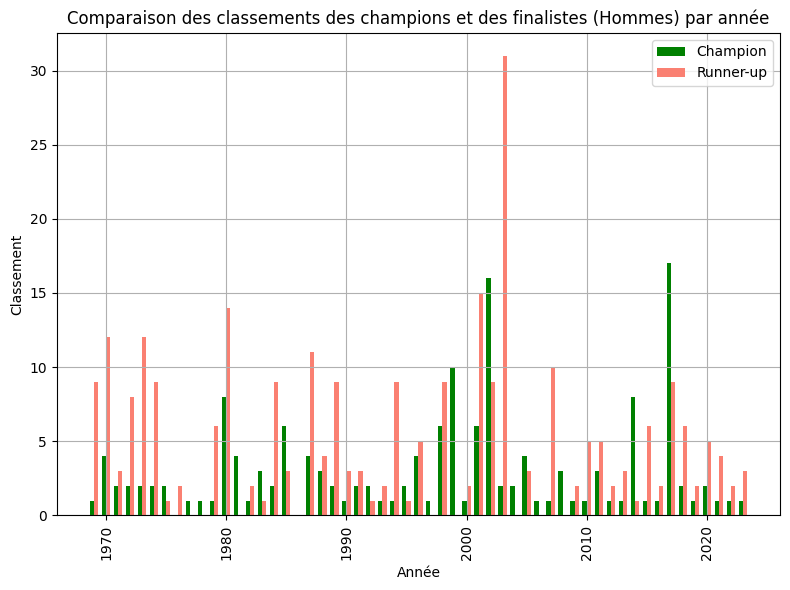

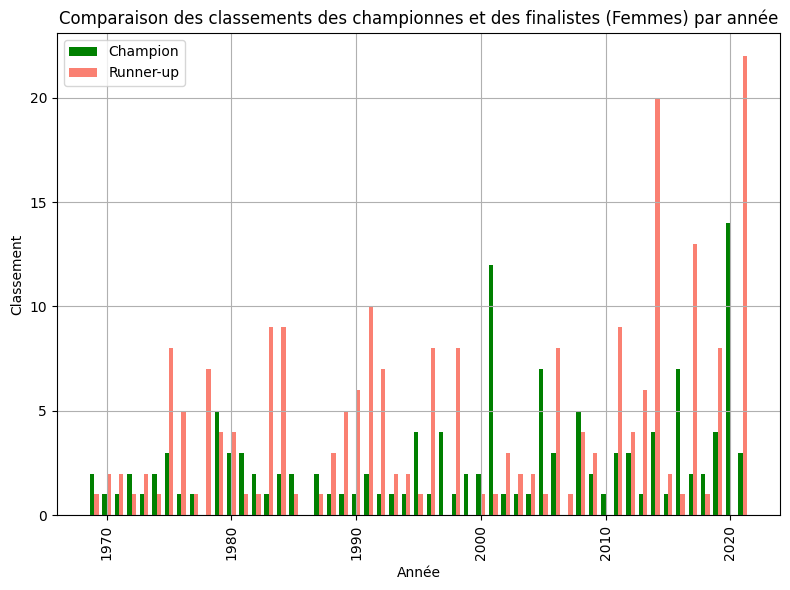

In [110]:
def plot_rank_comparison(df, title):
    data = df[['Year', 'Seed_Champion', 'Seed_Runner-up']]
    grouped_data = data.groupby('Year').agg({'Seed_Champion': 'min', 'Seed_Runner-up': 'min'})
    grouped_data = grouped_data.sort_index()
    plt.figure(figsize=(8, 6))
    bar_width = 0.35
    index = grouped_data.index
    champion_rankings = grouped_data['Seed_Champion']
    runner_up_rankings = grouped_data['Seed_Runner-up']
    plt.bar(index - bar_width/2, champion_rankings, bar_width, label='Champion', color='green')
    plt.bar(index + bar_width/2, runner_up_rankings, bar_width, label='Runner-up', color='salmon')

    plt.title(title)
    plt.xlabel('Année')
    plt.ylabel('Classement')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_rank_comparison(df1, "Comparaison des classements des champions et des finalistes (Hommes) par année")
plot_rank_comparison(df2, "Comparaison des classements des championnes et des finalistes (Femmes) par année")

------------------------------------------------------------------ Analyses matchs -------------------------------------------------------------------------------------------

1. Evolution matchs

In [97]:
df6 = pd.read_csv('KaggleMatches_cleaned.csv')
df6.head()

C:\Users\sonia\AppData\Local\Temp\ipykernel_37388\3032705956.py:1: DtypeWarning: Columns (3,8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df6 = pd.read_csv('KaggleMatches_cleaned.csv')


tourney_id tourney_name surface draw_size tourney_level tourney_date  \
0  2019-M020     Brisbane    Hard        32             A   2018-12-31   
1  2019-M020     Brisbane    Hard        32             A   2018-12-31   
2  2019-M020     Brisbane    Hard        32             A   2018-12-31   
3  2019-M020     Brisbane    Hard        32             A   2018-12-31   
4  2019-M020     Brisbane    Hard        32             A   2018-12-31   

   match_num  winner_id winner_seed winner_entry  ... l_1stWon l_2ndWon  \
0        300     105453         2.0            0  ...     34.0     20.0   
1        299     106421         4.0            0  ...     36.0      7.0   
2        298     105453         2.0            0  ...     15.0      6.0   
3        297     104542           0           PR  ...     38.0      9.0   
4        296     106421         4.0            0  ...     46.0     19.0   

   l_SvGms l_bpSaved  l_bpFaced  winner_rank winner_rank_points loser_rank  \
0     14.0      10.0       15.0          9.0             3590.0       16.0   
1     10.0      10.0       13.0         16.0             1977.0      239.0   
2      8.0       1.0        5.0          9.0             3590.0       40.0   
3     11.0       4.0        6.0        239.0              200.0       31.0   
4     15.0       2.0        4.0         16.0             1977.0       18.0   

  loser_rank_points league  
0            1977.0    atp  
1             200.0    atp  
2            1050.0    atp  
3            1298.0    atp  
4            1855.0    atp  

[5 rows x 50 columns]

Évolution temporelle du nombre de matchs

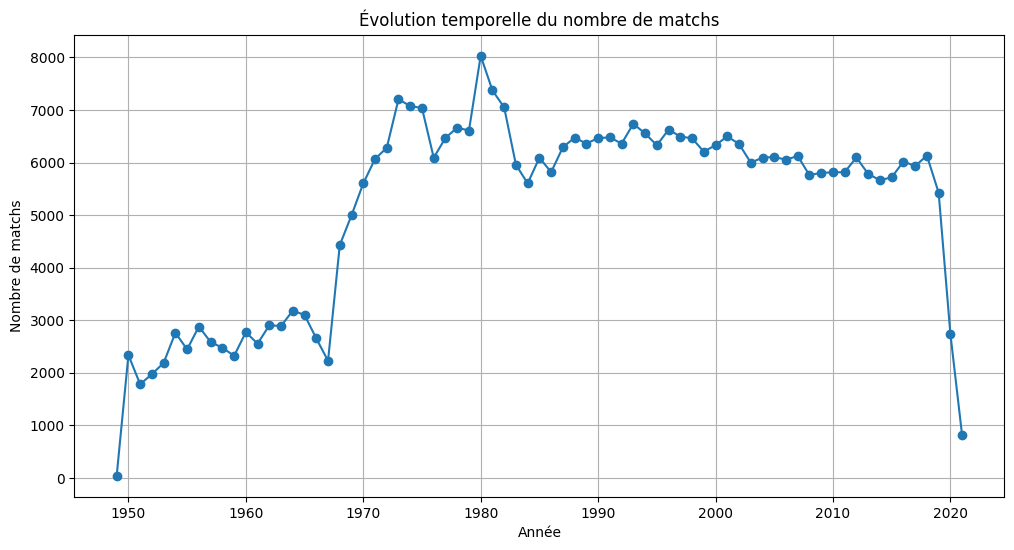

In [106]:
df6['tourney_date'] = pd.to_datetime(df6['tourney_date'])
df6['year'] = df6['tourney_date'].dt.year
plt.figure(figsize=(12, 6))
df6.groupby('year')['match_num'].count().plot(marker='o')
plt.title('Évolution temporelle du nombre de matchs')
plt.xlabel('Année')
plt.ylabel('Nombre de matchs')
plt.grid(True)
plt.show()

Distribution des surfaces des terrains de jeu  / Formats de matchs 

C:\Users\sonia\AppData\Local\Temp\ipykernel_37388\2686859202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df6, x='surface', palette='viridis', ax=axes[0])
C:\Users\sonia\AppData\Local\Temp\ipykernel_37388\2686859202.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df6, x='best_of', palette='Set2', ax=axes[1])


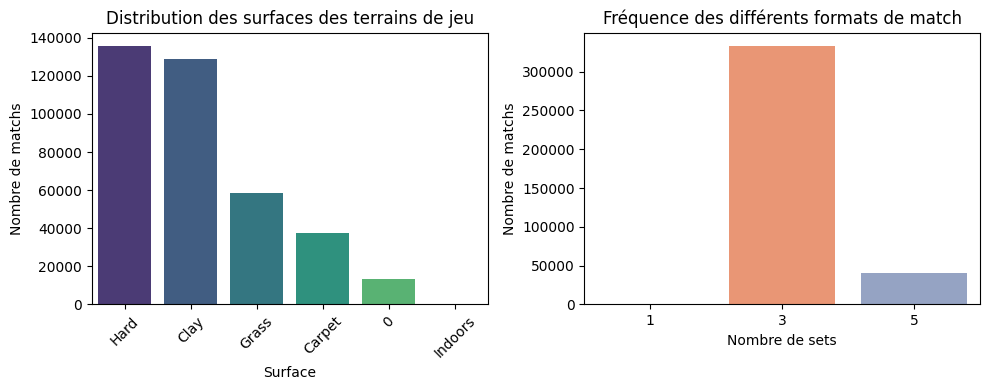

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.countplot(data=df6, x='surface', palette='viridis', ax=axes[0])
axes[0].set_title('Distribution des surfaces des terrains de jeu')
axes[0].set_xlabel('Surface')
axes[0].set_ylabel('Nombre de matchs')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df6, x='best_of', palette='Set2', ax=axes[1])
axes[1].set_title('Fréquence des différents formats de match')
axes[1].set_xlabel('Nombre de sets')
axes[1].set_ylabel('Nombre de matchs')
plt.tight_layout()
plt.show()

performances des joueurs en fonction de la surface du terrain  /  impact des paramètres du match sur sa durée

w_aces : le nombre d'aces (services gagnants) réalisés par le joueur gagnant dans un match de tennis.

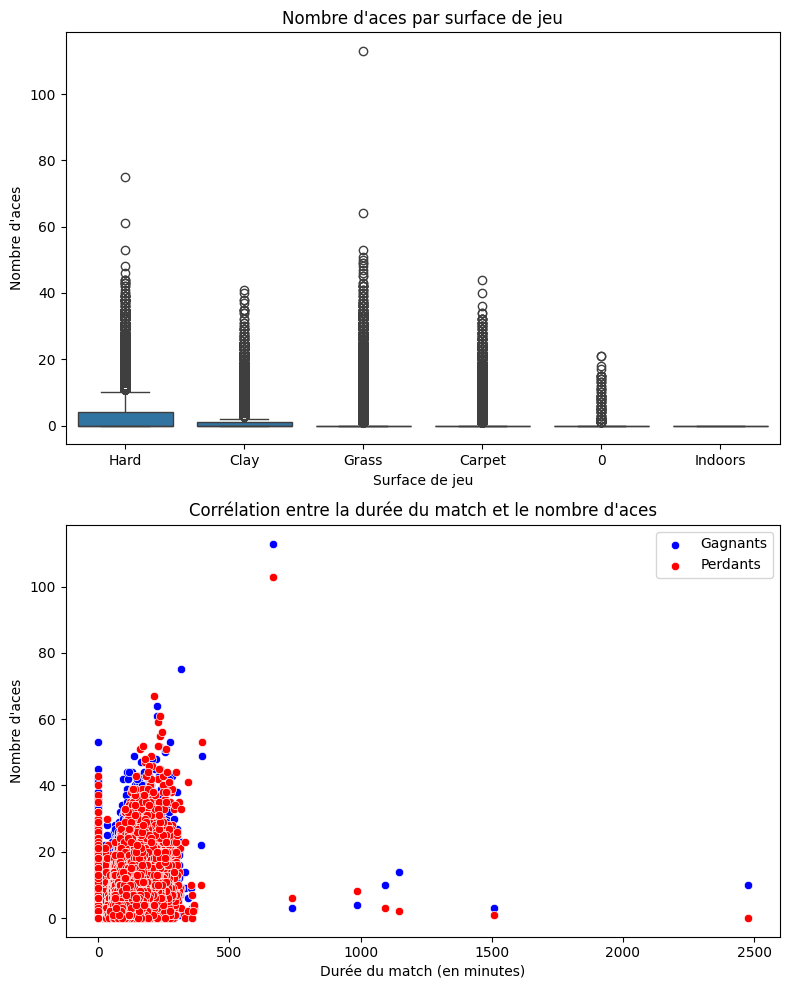

In [120]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
sns.boxplot(data=df6, x='surface', y='w_ace', ax=axes[0])
axes[0].set_title('Nombre d\'aces par surface de jeu')
axes[0].set_xlabel('Surface de jeu')
axes[0].set_ylabel('Nombre d\'aces')

sns.scatterplot(data=df6, x='minutes', y='w_ace', color='blue', label='Gagnants', ax=axes[1])
sns.scatterplot(data=df6, x='minutes', y='l_ace', color='red', label='Perdants', ax=axes[1])
axes[1].set_title('Corrélation entre la durée du match et le nombre d\'aces')
axes[1].set_xlabel('Durée du match (en minutes)')
axes[1].set_ylabel('Nombre d\'aces')
axes[1].legend()
plt.tight_layout()
plt.show()

performances des joueurs en fonction de leur classement   /   performances des joueurs en fonction de leur main dominante

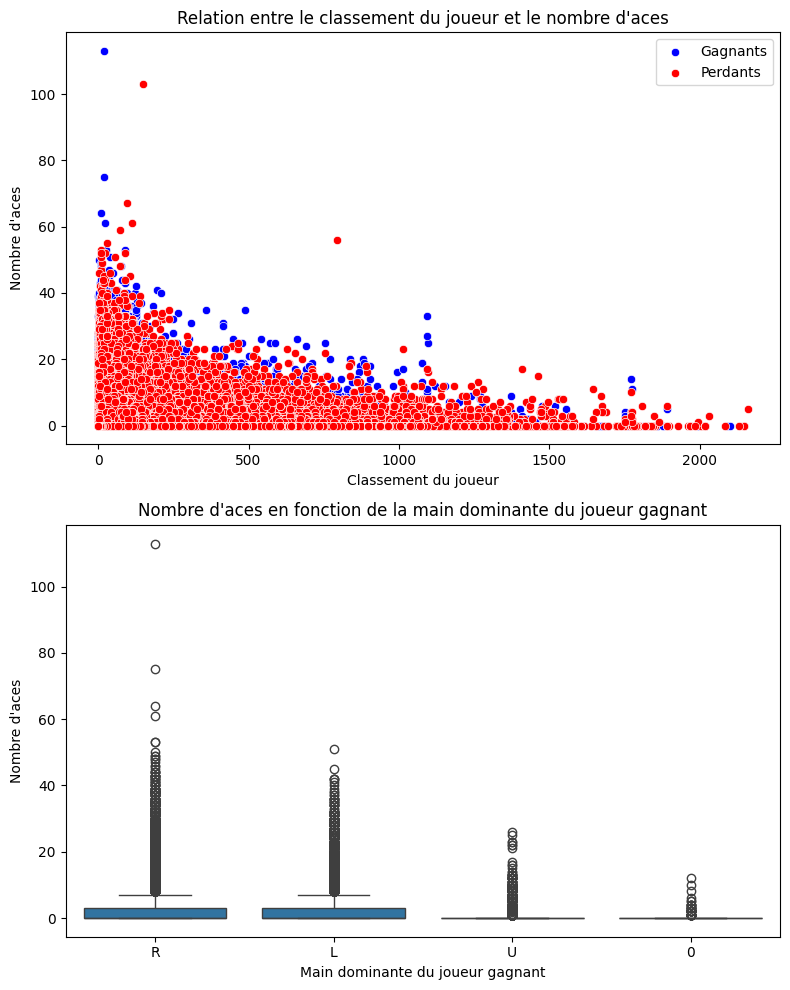

In [123]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
sns.scatterplot(data=df6, x='winner_rank', y='w_ace', color='blue', label='Gagnants', ax=axes[0])
sns.scatterplot(data=df6, x='loser_rank', y='l_ace', color='red', label='Perdants', ax=axes[0])
axes[0].set_title('Relation entre le classement du joueur et le nombre d\'aces')
axes[0].set_xlabel('Classement du joueur')
axes[0].set_ylabel('Nombre d\'aces')
axes[0].legend()

sns.boxplot(data=df6, x='winner_hand', y='w_ace', ax=axes[1])
axes[1].set_title('Nombre d\'aces en fonction de la main dominante du joueur gagnant')
axes[1].set_xlabel('Main dominante du joueur gagnant')
axes[1].set_ylabel('Nombre d\'aces')
plt.tight_layout()
plt.show()

--------------------------------------------------------------------- Fin Kagglematchs -------------------------------------------------------------------------------------------------

In [135]:
df7 = pd.read_csv('Grand_Slam_OpenChamps_nettoye.csv')
df7.head()

Year  Major#      Champion  Seed_Champion Ctry_Champion      Runner-up  \
0  1968     2.0  Ken Rosewall              2           AUS      Rod Laver   
1  1968     3.0     Rod Laver              1           AUS     Tony Roche   
2  1968     4.0   Arthur Ashe              5           USA      Tom Okker   
3  1969     1.0     Rod Laver              1           AUS  Andrés Gimeno   
4  1969     2.0     Rod Laver              1           AUS   Ken Rosewall   

   Seed_Runner-up Ctry_Runner-up         Score in the Final  Major  
0               1            AUS         6–3, 6–1, 2–6, 6–2    0.0  
1              15            AUS              6–3, 6–4, 6–2    0.0  
2               8            NED  14–12, 5–7, 6–3, 3–6, 6–3    0.0  
3               9            ESP              6–3, 6–4, 7–5    0.0  
4               4            AUS              6–4, 6–3, 6–4    0.0

Évolution des performances au fil du temps :

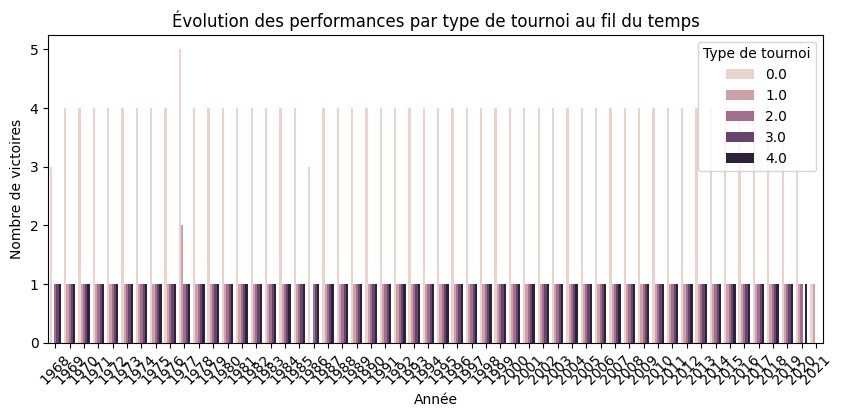

In [143]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df7, x='Year', hue='Major')
plt.title('Évolution des performances par type de tournoi au fil du temps')
plt.xlabel('Année')
plt.ylabel('Nombre de victoires')
plt.legend(title='Type de tournoi')
plt.xticks(rotation=45)
plt.show()

---------------------------- Fin grand Slam -----------------------------------------------------

In [151]:
df12 = pd.read_csv('serve_times.csv')
df13 = pd.read_csv('events_time.csv')
df13 

tournament surface  seconds_added_per_point      years
0          Wimbledon   Grass                    -2.98  1991-2014
1    London Olympics   Grass                    -2.62       2012
2         Manchester   Grass                    -2.33  1991-1994
3         Eastbourne   Grass                    -1.78  2009-2014
4         Birmingham  Carpet                    -1.63       1991
..               ...     ...                      ...        ...
200     Viña del Mar    Clay                     4.96       2009
201         Florence    Clay                     5.08  1991-1994
202  Costa Do Sauipe    Clay                     5.19  2004-2011
203           Maceio    Clay                     5.28       1992
204         Rio Open    Clay                     5.38       2015

[205 rows x 4 columns]

1. serve_times

    Histogramme des temps de service

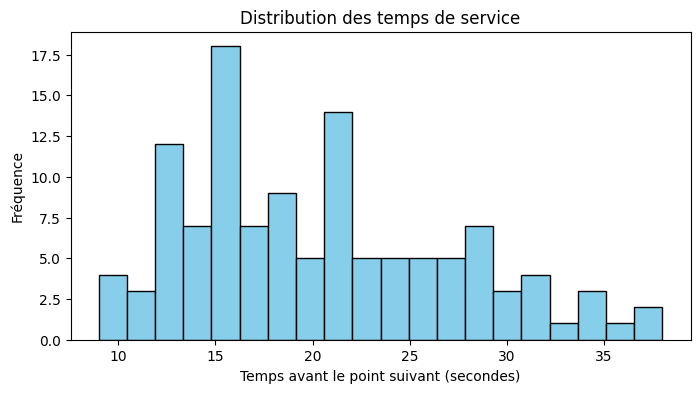

In [145]:
plt.figure(figsize=(8, 4))
plt.hist(df12['seconds_before_next_point'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution des temps de service')
plt.xlabel('Temps avant le point suivant (secondes)')
plt.ylabel('Fréquence')
plt.show()

2. Comparaison des temps de service entre les joueurs

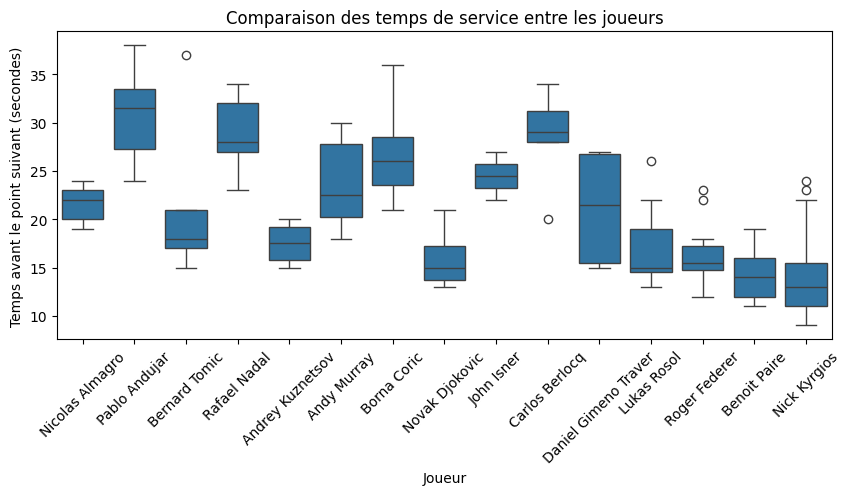

In [148]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df12, x='server', y='seconds_before_next_point')
plt.title('Comparaison des temps de service entre les joueurs')
plt.xlabel('Joueur')
plt.ylabel('Temps avant le point suivant (secondes)')
plt.xticks(rotation=45)
plt.show()

3. Analyse des temps de service en fonction du score du jeu

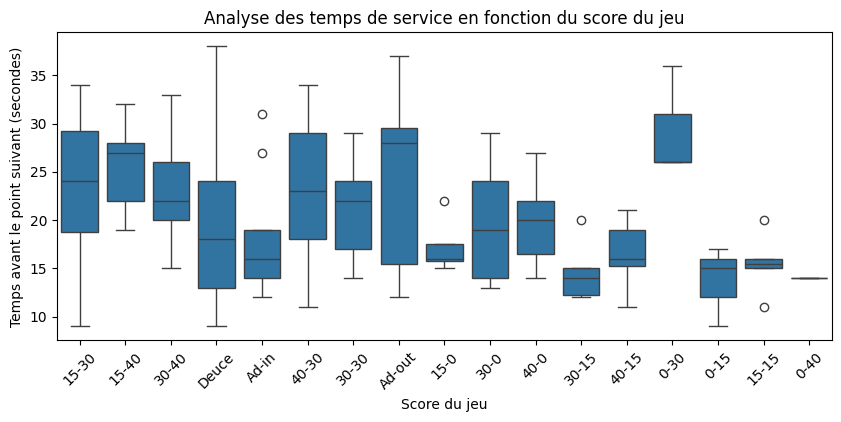

In [150]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df12, x='game_score', y='seconds_before_next_point')
plt.title('Analyse des temps de service en fonction du score du jeu')
plt.xlabel('Score du jeu')
plt.ylabel('Temps avant le point suivant (secondes)')
plt.xticks(rotation=45)
plt.show()

2.  events_time 



Comparaison des secondes ajoutées par point entre différentes surfaces sur les années

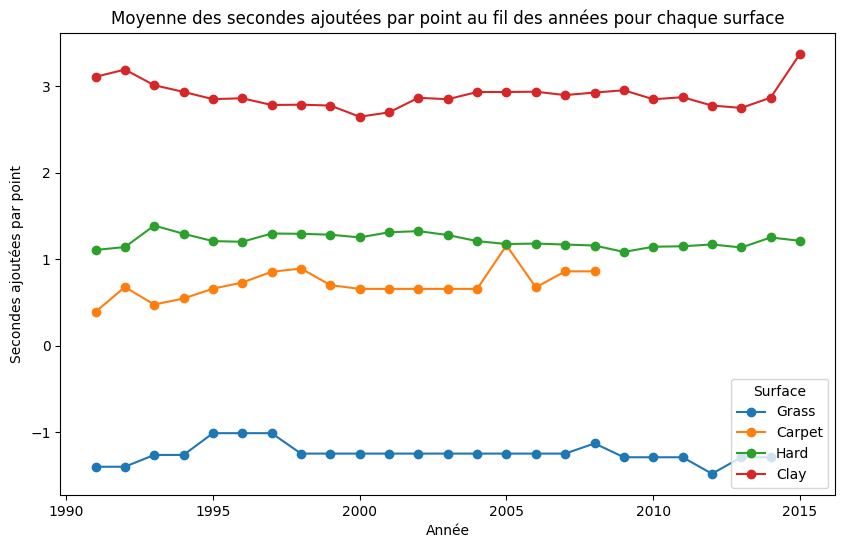

In [154]:
df13['start_year'] = df13['years'].apply(lambda x: int(x.split('-')[0]))
df13['end_year'] = df13['years'].apply(lambda x: int(x.split('-')[-1]) if '-' in x else int(x))
years_range = range(df13['start_year'].min(), df13['end_year'].max() + 1)
surfaces = df13['surface'].unique()
plt.figure(figsize=(10, 6))
for surface in surfaces:
    avg_seconds_per_year = []
    for year in years_range:
        avg_seconds_per_year.append(df13[(df13['start_year'] <= year) & 
                                         (df13['end_year'] >= year) & 
                                         (df13['surface'] == surface)]['seconds_added_per_point'].mean())
    plt.plot(years_range, avg_seconds_per_year, marker='o', label=surface)
plt.title('Moyenne des secondes ajoutées par point au fil des années pour chaque surface')
plt.xlabel('Année')
plt.ylabel('Secondes ajoutées par point')
plt.legend(title='Surface')
plt.show()

Analyse des secondes ajoutées par point au fil des années

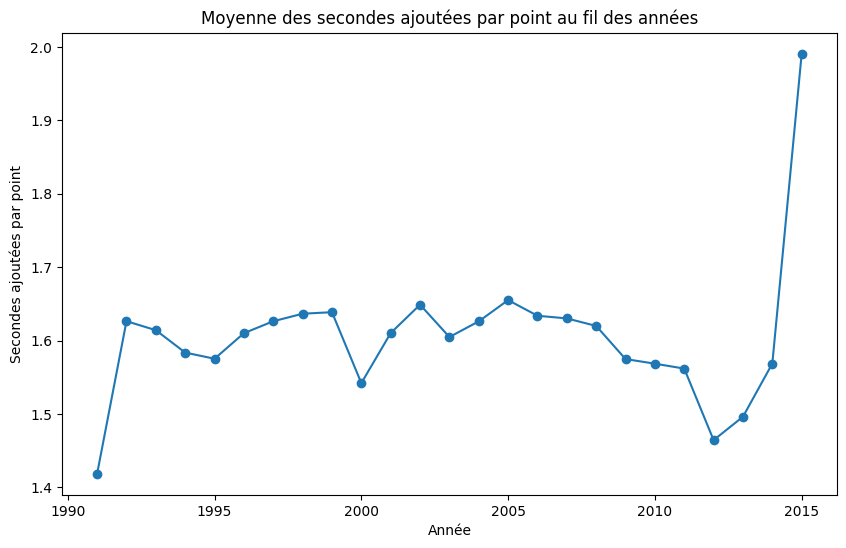

In [156]:
df13['start_year'] = df13['years'].apply(lambda x: int(x.split('-')[0]))
df13['end_year'] = df13['years'].apply(lambda x: int(x.split('-')[-1]) if '-' in x else int(x))
years_range = range(df13['start_year'].min(), df13['end_year'].max() + 1)
avg_seconds_per_year = []
for year in years_range:
    avg_seconds_per_year.append(df13[(df13['start_year'] <= year) & (df13['end_year'] >= year)]['seconds_added_per_point'].mean())
plt.figure(figsize=(10, 6))
plt.plot(years_range, avg_seconds_per_year, marker='o')
plt.title('Moyenne des secondes ajoutées par point au fil des années')
plt.xlabel('Année')
plt.ylabel('Secondes ajoutées par point')
plt.show()

In [174]:
df14 = pd.read_excel('atp_players_00_12.xlsx')
df15 = pd.read_excel('atp_players_13-24.xlsx')
df16 = pd.read_excel('wta_07_09.xlsx')
df17 = pd.read_excel('merged_wta_datasets.xlsx')
df17.head()

year  WTA  Location   Tournament                 Date           Tier  \
0  2010    1  Auckland  ASB Classic  2010-01-03 00:00:00  International   
1  2010    1  Auckland  ASB Classic  2010-01-04 00:00:00  International   
2  2010    1  Auckland  ASB Classic  2010-01-04 00:00:00  International   
3  2010    1  Auckland  ASB Classic  2010-01-04 00:00:00  International   
4  2010    1  Auckland  ASB Classic  2010-01-04 00:00:00  International   

     Court Surface      Round  Best of  ...    LBW    LBL    PSW    PSL  \
0  Outdoor    Hard  1st Round        3  ...  1.167  4.500  1.261  4.410   
1  Outdoor    Hard  1st Round        3  ...  1.143  5.000  1.137  7.140   
2  Outdoor    Hard  1st Round        3  ...  1.333  3.250  1.341  3.650   
3  Outdoor    Hard  1st Round        3  ...  2.200  1.615  2.200  1.769   
4  Outdoor    Hard  1st Round        3  ...  2.000  1.727  1.926  2.000   

     SJW    SJL  MaxW  MaxL  AvgW  AvgL  
0  1.200  4.000   0.0   0.0   0.0   0.0  
1  1.154  4.750   0.0   0.0   0.0   0.0  
2  1.286  3.250   0.0   0.0   0.0   0.0  
3  2.250  1.571   0.0   0.0   0.0   0.0  
4  1.909  1.800   0.0   0.0   0.0   0.0  

[5 rows x 39 columns]

 I. Analyse df14 et df15 = atp_players_00_12.xlsx  et atp_players_13-24.xlsx

In [160]:
df_combined = pd.concat([df14, df15], ignore_index=True)

1. Répartition des tournois par série 

2.Evolution du nombre de tournois au fil des années

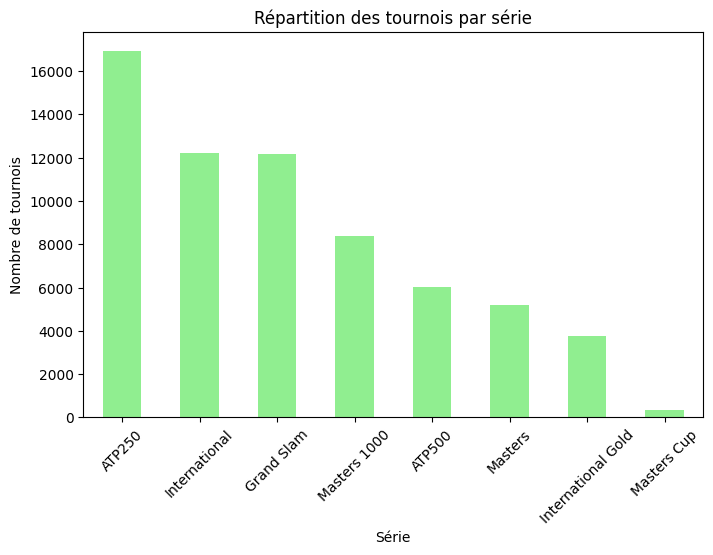

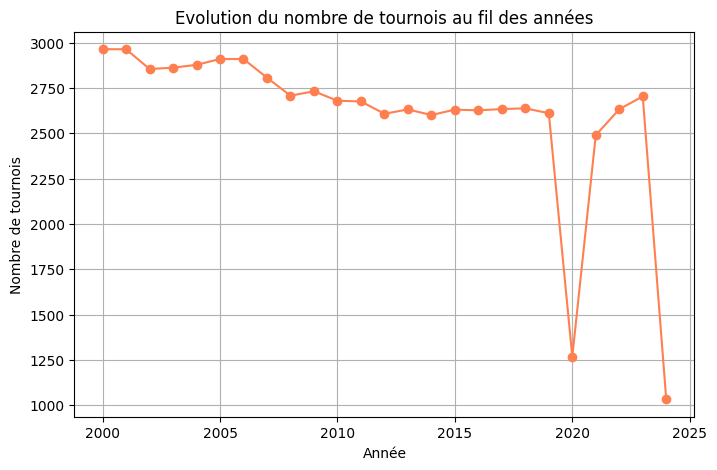

In [164]:
plt.figure(figsize=(8, 5))
df_combined['Series'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Répartition des tournois par série')
plt.xlabel('Série')
plt.ylabel('Nombre de tournois')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
df_combined.groupby('year')['Tournament'].count().plot(kind='line', marker='o', color='coral')
plt.title('Evolution du nombre de tournois au fil des années')
plt.xlabel('Année')
plt.ylabel('Nombre de tournois')
plt.grid(True)
plt.show()

2. Distribution de MaxW et MaxL par surface de jeu

MaxW (Maximum Wins) : Le nombre maximum de jeux qu'un joueur a gagnés dans un set ou un match.

MaxL (Maximum Losses) : Le nombre maximum de jeux qu'un joueur a perdus dans un set ou un match.

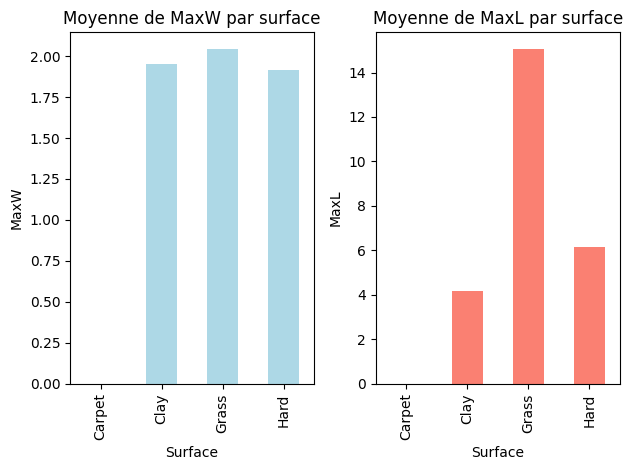

In [166]:
# MaxW
plt.subplot(1, 2, 1)
df_combined.groupby('Surface')['MaxW'].mean().plot(kind='bar', color='lightblue')
plt.title('Moyenne de MaxW par surface')
plt.xlabel('Surface')
plt.ylabel('MaxW')

# MaxL
plt.subplot(1, 2, 2)
df_combined.groupby('Surface')['MaxL'].mean().plot(kind='bar', color='salmon')
plt.title('Moyenne de MaxL par surface')
plt.xlabel('Surface')
plt.ylabel('MaxL')
plt.tight_layout()
plt.show()

Répartition des Sets Gagnés et Perdus

C:\Users\sonia\AppData\Local\Temp\ipykernel_37388\2058194088.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='Surface', y='Wsets', palette='pastel')
C:\Users\sonia\AppData\Local\Temp\ipykernel_37388\2058194088.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='Surface', y='Lsets', palette='pastel')


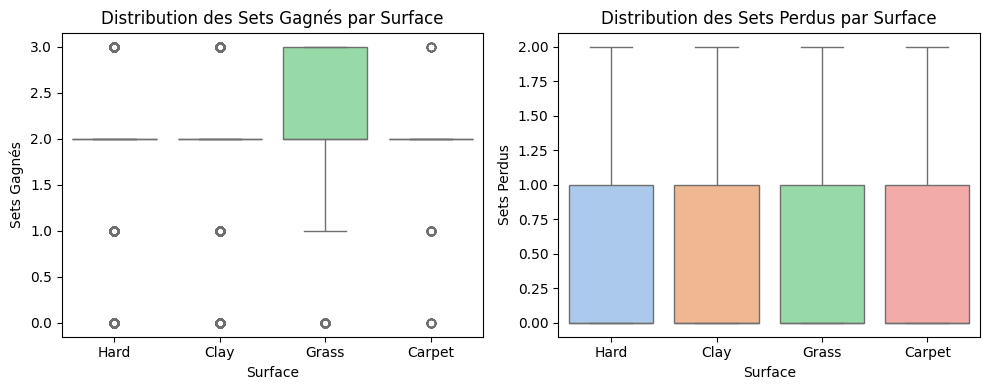

In [172]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_combined, x='Surface', y='Wsets', palette='pastel')
plt.title('Distribution des Sets Gagnés par Surface')
plt.xlabel('Surface')
plt.ylabel('Sets Gagnés')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_combined, x='Surface', y='Lsets', palette='pastel')
plt.title('Distribution des Sets Perdus par Surface')
plt.xlabel('Surface')
plt.ylabel('Sets Perdus')
plt.tight_layout()
plt.show()

 II. Analyse df16 et df17 = wta_07_09xlsx  et merged_wta_datasets_13-24.xlsx

1. Répartition des Tournois par Surface et par Année    

2.Nombre Moyen de Sets Gagnés par Surface

C:\Users\sonia\AppData\Local\Temp\ipykernel_37388\1402777235.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=avg_sets_won, x='Surface', y='Wsets', palette='viridis')


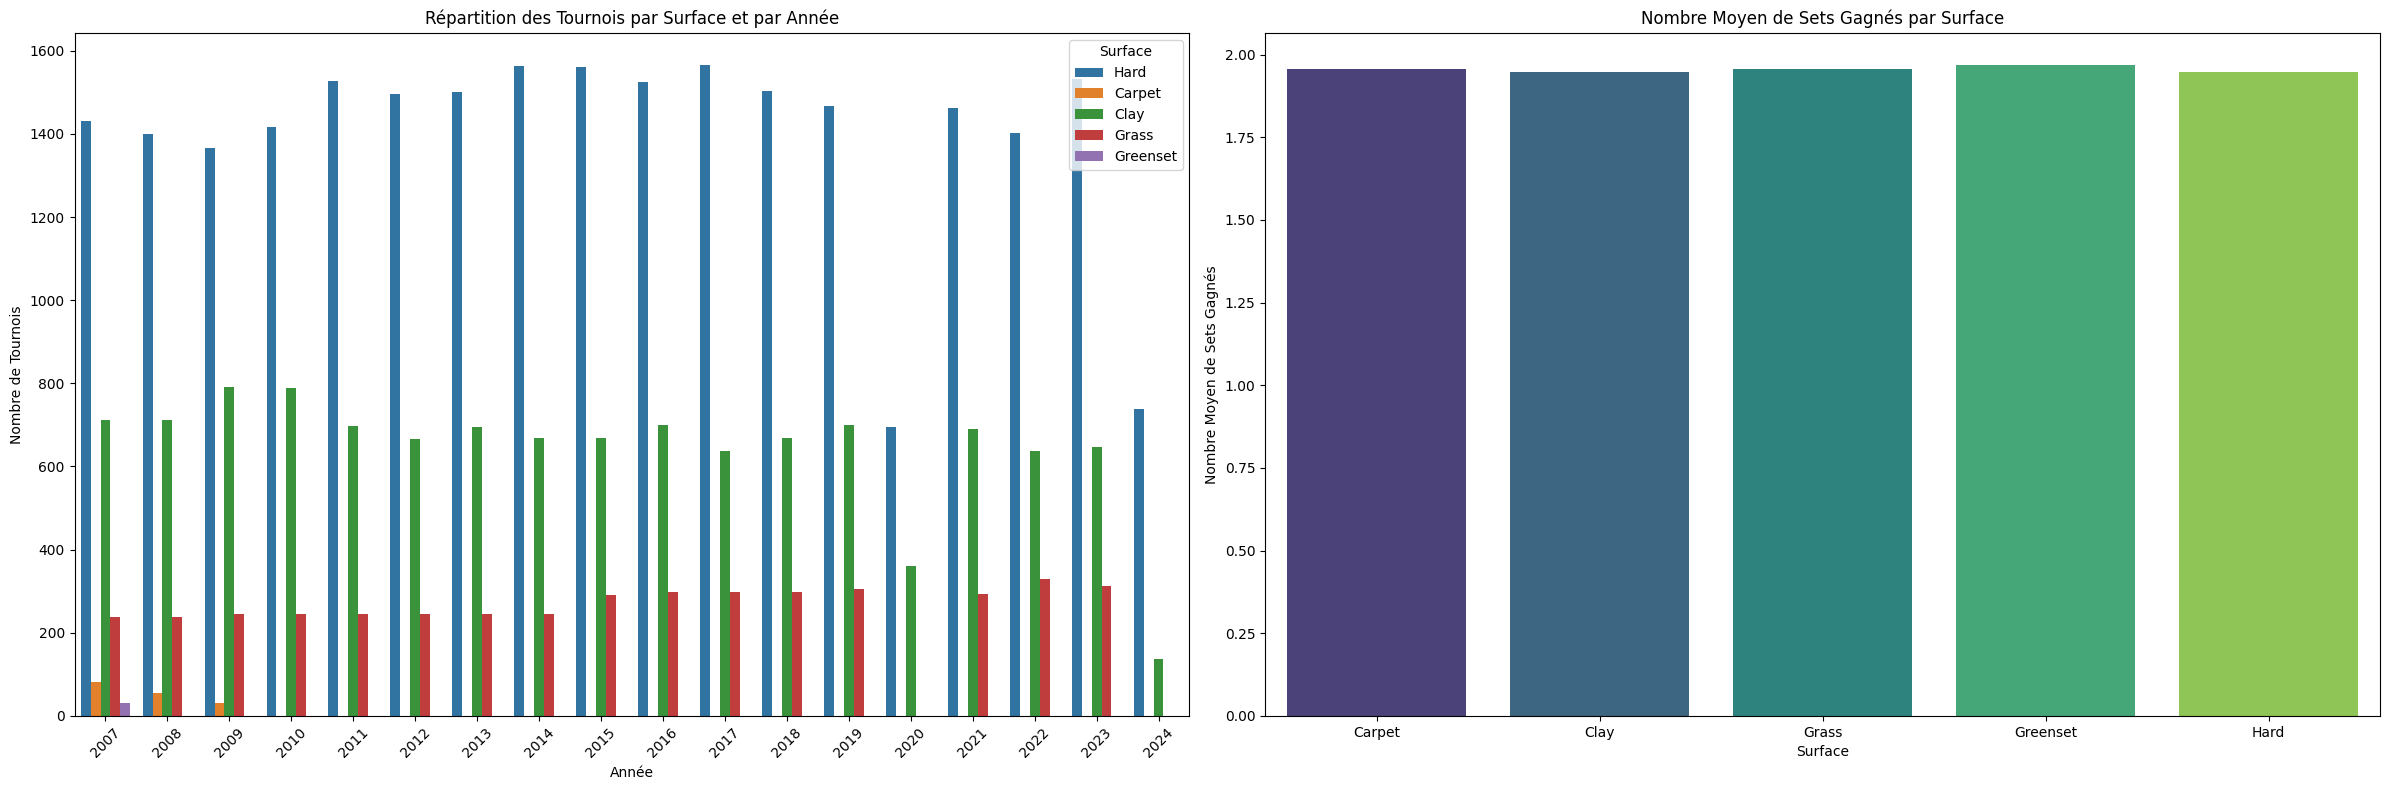

In [181]:
df_combined_wta = pd.concat([df16, df17])

fig, axes = plt.subplots(1, 2, figsize=(24, 8))
sns.countplot(ax=axes[0], data=df_combined_wta, x='year', hue='Surface')
axes[0].set_title('Répartition des Tournois par Surface et par Année')
axes[0].set_xlabel('Année')
axes[0].set_ylabel('Nombre de Tournois')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Surface')

avg_sets_won = df_combined_wta.groupby('Surface')['Wsets'].mean().reset_index()
sns.barplot(ax=axes[1], data=avg_sets_won, x='Surface', y='Wsets', palette='viridis')
axes[1].set_title('Nombre Moyen de Sets Gagnés par Surface')
axes[1].set_xlabel('Surface')
axes[1].set_ylabel('Nombre Moyen de Sets Gagnés')
plt.tight_layout()
plt.show()


moyennes et max des points par année

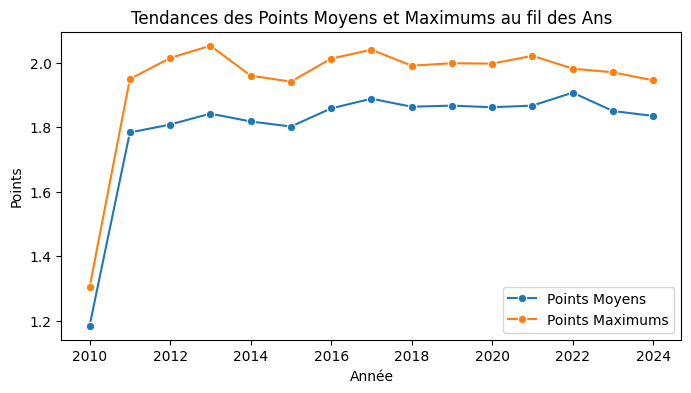

In [183]:
df_combined['AvgW'] = df_combined[['AvgW']].astype(float)
df_combined['MaxW'] = df_combined[['MaxW']].astype(float)
points_stats = df_combined.groupby('year')[['AvgW', 'MaxW']].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=points_stats, x='year', y='AvgW', marker='o', label='Points Moyens')
sns.lineplot(data=points_stats, x='year', y='MaxW', marker='o', label='Points Maximums')
plt.title('Tendances des Points Moyens et Maximums au fil des Ans')
plt.xlabel('Année')
plt.ylabel('Points')
plt.legend()
plt.show()

--------------------------------------------------------------------------- Fin Matchs -------------------------------------------------------------------------------------------------------------

III. Joueurs 

1. KagglePlayers 

In [185]:
df_kg = pd.read_csv('KagglePlayers_nettoye.csv')
df_kg.head()


Unnamed: 0  player_id      name_first name_last hand   birthdate country  \
0           0     100001         Gardnar    Mulloy    R  1913-11-22     USA   
1           1     100002          Pancho    Segura    R  1921-06-20     ECU   
2           2     100003           Frank   Sedgman    R  1927-10-02     AUS   
3           3     100004        Giuseppe     Merlo    R  1927-10-11     ITA   
4           4     100005  Richard Pancho  Gonzales    R  1928-05-09     USA   

  gender    age  
0   male  110.0  
1   male  102.0  
2   male   96.0  
3   male   96.0  
4   male   96.0

 Répartition des Joueurs par Main Dominante

 Répartition des Joueurs par Décennie de Naissance

 Répartition des Joueurs par Genre

 Distribution des Âges des Joueurs

C:\Users\sonia\AppData\Local\Temp\ipykernel_37388\3162074043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_kg, x='hand', palette='viridis')


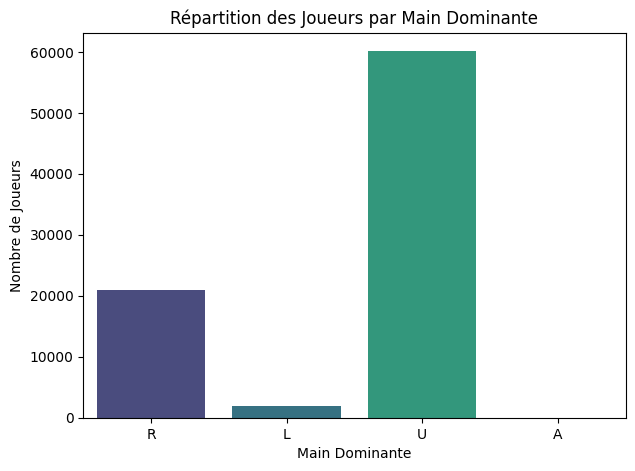

C:\Users\sonia\AppData\Local\Temp\ipykernel_37388\3162074043.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_kg, x='birth_decade', palette='viridis')


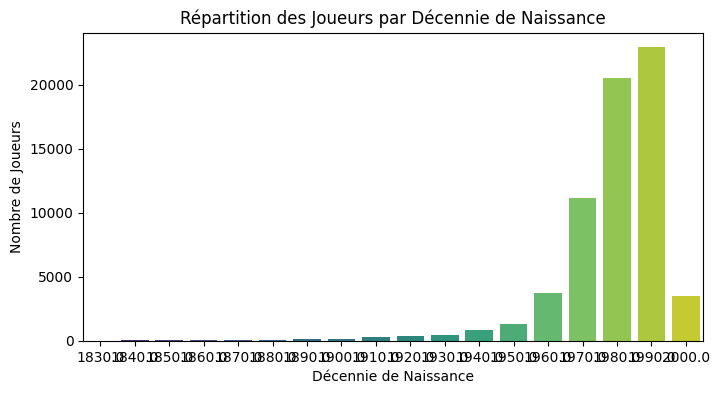

C:\Users\sonia\AppData\Local\Temp\ipykernel_37388\3162074043.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_kg, x='gender', palette='viridis')


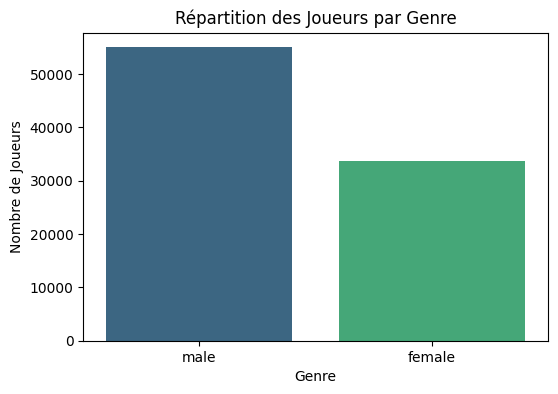

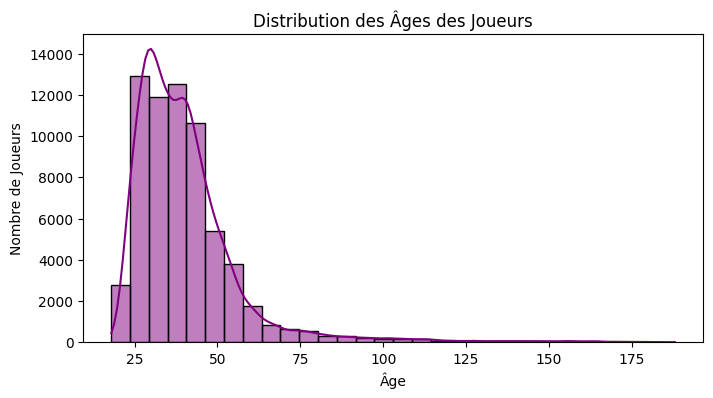

In [190]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df_kg, x='hand', palette='viridis')
plt.title('Répartition des Joueurs par Main Dominante')
plt.xlabel('Main Dominante')
plt.ylabel('Nombre de Joueurs')
plt.show()

df_kg['birth_year'] = pd.to_datetime(df_kg['birthdate']).dt.year
df_kg['birth_decade'] = (df_kg['birth_year'] // 10) * 10

plt.figure(figsize=(8, 4))
sns.countplot(data=df_kg, x='birth_decade', palette='viridis')
plt.title('Répartition des Joueurs par Décennie de Naissance')
plt.xlabel('Décennie de Naissance')
plt.ylabel('Nombre de Joueurs')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df_kg, x='gender', palette='viridis')
plt.title('Répartition des Joueurs par Genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de Joueurs')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df_kg['age'], bins=30, kde=True, color='purple')
plt.title('Distribution des Âges des Joueurs')
plt.xlabel('Âge')
plt.ylabel('Nombre de Joueurs')
plt.show()


2. Dataset 'atpwta_Rank_nettoye' 

In [193]:
df_rnk = pd.read_csv('atpwta_Rank_nettoye.csv')
df_rnk.head()

Player Name  Ranking   Ranking
0   Novak Djokovic      1.0       NaN
1     Rafael Nadal      2.0       NaN
2    Roger Federer      3.0       NaN
3    Dominic Thiem      4.0       NaN
4  Daniil Medvedev      5.0       NaN

Classement des 10 Premiers Joueurs

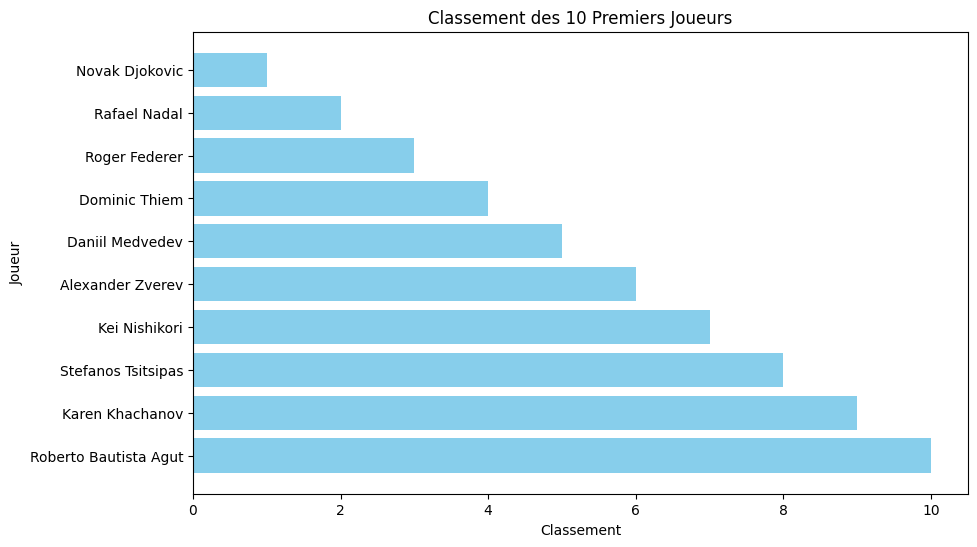

In [197]:
top_10_players = df_rnk.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_players['Player Name'], top_10_players['Ranking'], color='skyblue')
plt.xlabel('Classement')
plt.ylabel('Joueur')
plt.title('Classement des 10 Premiers Joueurs')
plt.gca().invert_yaxis() 
plt.show()

4. Dataset 'GOATList_nettoye' 

In [219]:
df_gl = pd.read_csv('GOATList_nettoye.csv')                
df_gl.head()

Unnamed: 0  rank            name   country_name country_id  active  \
0           0     1  Novak Djokovic         Serbia        SRB       1   
1           1     2   Roger Federer    Switzerland        SUI       0   
2           2     3    Rafael Nadal          Spain        ESP       0   
3           3     4   Jimmy Connors  United States        USA       0   
4           4     5      Ivan Lendl  United States        USA       0   

          dob  totalPoints  tournamentPoints  rankingPoints  ...  altFinals  \
0  1987-05-22         1102               595            241  ...          0   
1  1981-08-08          924               566            200  ...          0   
2  1986-06-03          885               526            186  ...          0   
3  1952-09-02          616               402            151  ...          2   
4  1960-03-07          604               395            141  ...          2   

   masters  olympics  bigTitles  titles  weeksAtNo1   wonLost  bestEloRating  \
0       40         0         71      98         404  1084-210           2629   
1       28         0         54     103         310  1245-275           2550   
2       36         1         59      92         209  1066-219           2552   
3       20         0         31     109         268  1275-285           2521   
4       18         0         33      94         270  1069-242           2518   

   bestEloRatingDate  wonPct  
0         2016-02-01   83.8%  
1         2007-03-05   81.9%  
2         2013-09-09   83.0%  
3         1978-10-29   81.7%  
4         1986-03-24   81.5%  

[5 rows x 42 columns]

1. Répartition des Points Totaux des Meilleurs Joueurs

2.Nombre de Semaines en tant que Numéro 1 Mondial

C:\Users\sonia\AppData\Local\Temp\ipykernel_37388\4012343193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_gl, x='name', y='totalPoints', palette='viridis')


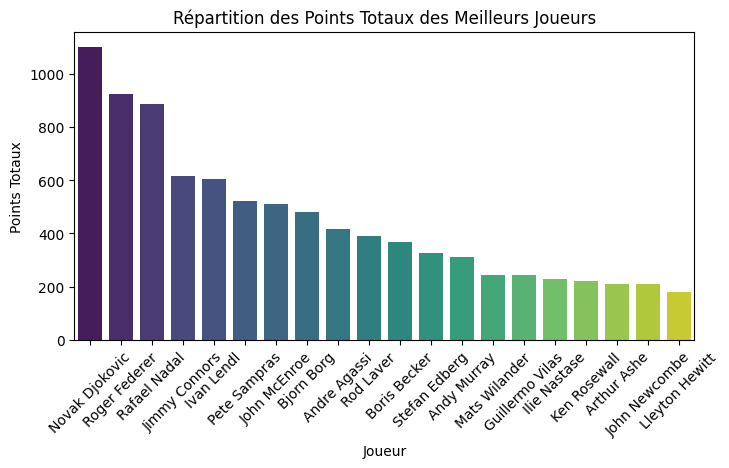

C:\Users\sonia\AppData\Local\Temp\ipykernel_37388\4012343193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_gl, x='name', y='weeksAtNo1', palette='viridis')


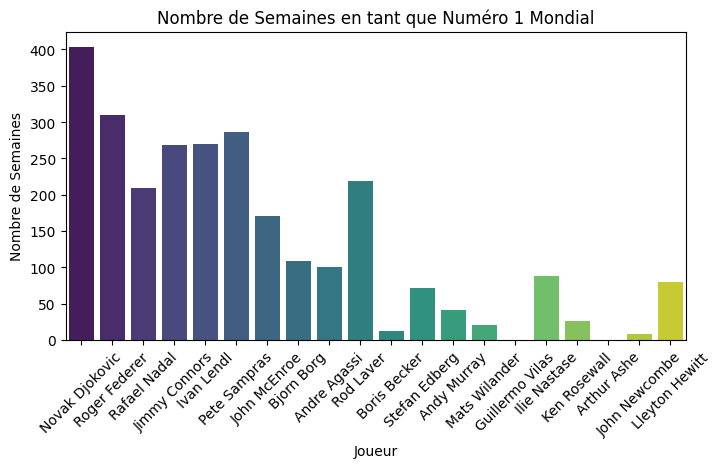

In [201]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df_gl, x='name', y='totalPoints', palette='viridis')
plt.title('Répartition des Points Totaux des Meilleurs Joueurs')
plt.xlabel('Joueur')
plt.ylabel('Points Totaux')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=df_gl, x='name', y='weeksAtNo1', palette='viridis')
plt.title('Nombre de Semaines en tant que Numéro 1 Mondial')
plt.xlabel('Joueur')
plt.ylabel('Nombre de Semaines')
plt.xticks(rotation=45)
plt.show()

2. Nombre de Titres Gagnés par les Meilleurs Joueurs

Pourcentage de Victoires par Joueur


C:\Users\sonia\AppData\Local\Temp\ipykernel_37388\2015926921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_gl, x='name', y='titles', palette='viridis')


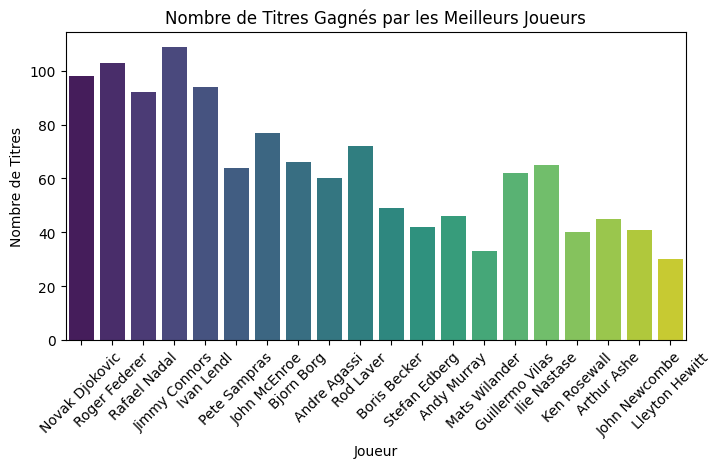

C:\Users\sonia\AppData\Local\Temp\ipykernel_37388\2015926921.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_gl, x='name', y='wonPct', palette='viridis')


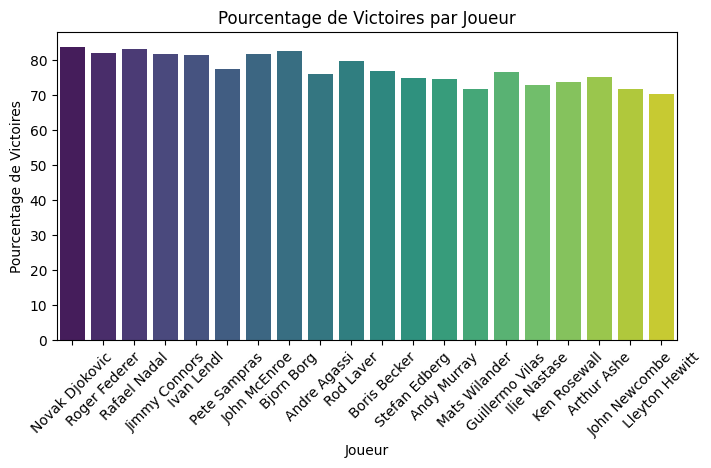

In [208]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df_gl, x='name', y='titles', palette='viridis')
plt.title('Nombre de Titres Gagnés par les Meilleurs Joueurs')
plt.xlabel('Joueur')
plt.ylabel('Nombre de Titres')
plt.xticks(rotation=45)
plt.show()

df_gl['wonPct'] = df_gl['wonPct'].str.replace('%', '').astype(float)
plt.figure(figsize=(8, 4))
sns.barplot(data=df_gl, x='name', y='wonPct', palette='viridis')
plt.title('Pourcentage de Victoires par Joueur')
plt.xlabel('Joueur')
plt.ylabel('Pourcentage de Victoires')
plt.xticks(rotation=45)
plt.show()

6. Dataset 'major_df' 

In [218]:
df_tm = pd.read_csv('players_time_nettoye.csv')
df_tm.head()

player  seconds_added_per_point
0    Dustin Brown                    -6.37
1   Rohan Bopanna                    -4.95
2  Chris Guccione                    -4.63
3    Benoit Paire                    -4.56
4    Lukas Dlouhy                    -4.35

Top 20 des Joueurs avec le Moins de Secondes Ajoutées par Point

C:\Users\sonia\AppData\Local\Temp\ipykernel_37388\3860555034.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_least_seconds, x='seconds_added_per_point', y='player', palette='viridis')


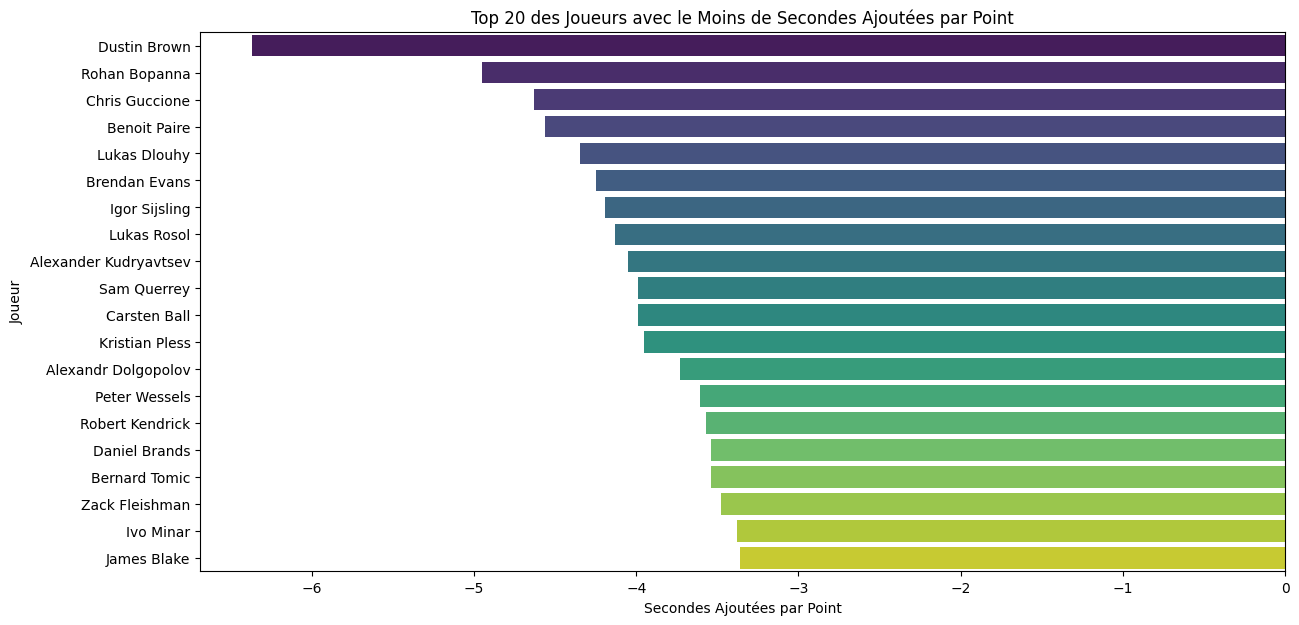

In [222]:
top_20_least_seconds = df_tm.nsmallest(20, 'seconds_added_per_point')
plt.figure(figsize=(14, 7))
sns.barplot(data=top_20_least_seconds, x='seconds_added_per_point', y='player', palette='viridis')
plt.title('Top 20 des Joueurs avec le Moins de Secondes Ajoutées par Point')
plt.xlabel('Secondes Ajoutées par Point')
plt.ylabel('Joueur')
plt.show()

------------------------------------------------------------------------------------- Fin Joueurs -------------------------------------------------------------------------------------------------------

IV . Equimenets 

1. Dataset 'fr-en-dataes-types-d-equipement_nettoye'

In [27]:
df_fr = pd.read_excel('fr-en-dataes-types-d-equipement_nettoye.xlsx')
equipements_uniques = df_fr['EquipementTypeLib'].unique()
non_tennis_equipements = [equipement for equipement in equipements_uniques if 'tennis' not in str(equipement).lower()]
df_tennis_cleaned = df_fr[~df_fr['EquipementTypeLib'].isin(non_tennis_equipements)]
df_tennis_cleaned.head()

DepLib          ComLib  \
0  Val-d'Oise    Brignancourt   
1  Val-d'Oise           Cergy   
3  Val-d'Oise  Deuil-la-Barre   
4  Val-d'Oise          Domont   
5  Val-d'Oise        Eaubonne   

                                              InsNom  EquipementId  \
0                                    Stade Municipal        157164   
1                   Île de loisirs de Cergy-Neuville        154884   
3                           Tennis Club de la Source        154935   
4                             Tennis des Beursillons        154959   
5  Centre Departemental de Formation et d'Animati...        159232   

                        Niveau pratiqué NatureLibelle          InsLibelleVoie  \
0                          Entrainement     Découvert      Rue de la Jeunesse   
1  Loisir - Entretien - Remise en forme     Découvert          Rue des Etangs   
3                          Entrainement     Découvert       Rue des Martinets   
4                 Compétition régionale   Découvrable  Chemin des Beursillons   
5                          Entrainement     Découvert   Rue des Bouquinvilles   

   InsCodePostal                               Utilisation  \
0          95640                       Récréation sportive   
1          95000  Récréation sportive,Performance sportive   
3          95170                        Formation sportive   
4          95330                        Formation sportive   
5          95600                        Formation sportive   

                                        Utilisateurs  \
0  Clubs sportifs / Comités / Ligues / Fédération...   
1  Scolaires / Universités,Autre(s) association(s...   
3                         Individuel(s) / Famille(s)   
4    Clubs sportifs / Comités / Ligues / Fédérations   
5                         Individuel(s) / Famille(s)   

                                             typeerp EquipementTypeLib  \
0                         Établissement de plein air   Court de tennis   
1                         Établissement de plein air   Court de tennis   
3                         Établissement de plein air   Court de tennis   
4  Établissement sportif couvert;Établissement de...   Court de tennis   
5                         Établissement de plein air   Court de tennis   

   InsArrondissement Famille type d'équipement  
0                  0           Court de tennis  
1                  0           Court de tennis  
3                  0           Court de tennis  
4                  0           Court de tennis  
5                  0           Court de tennis

1. Deplib et Comlib/ InsNom : Nombre des installation selon les départements et les communes en France 

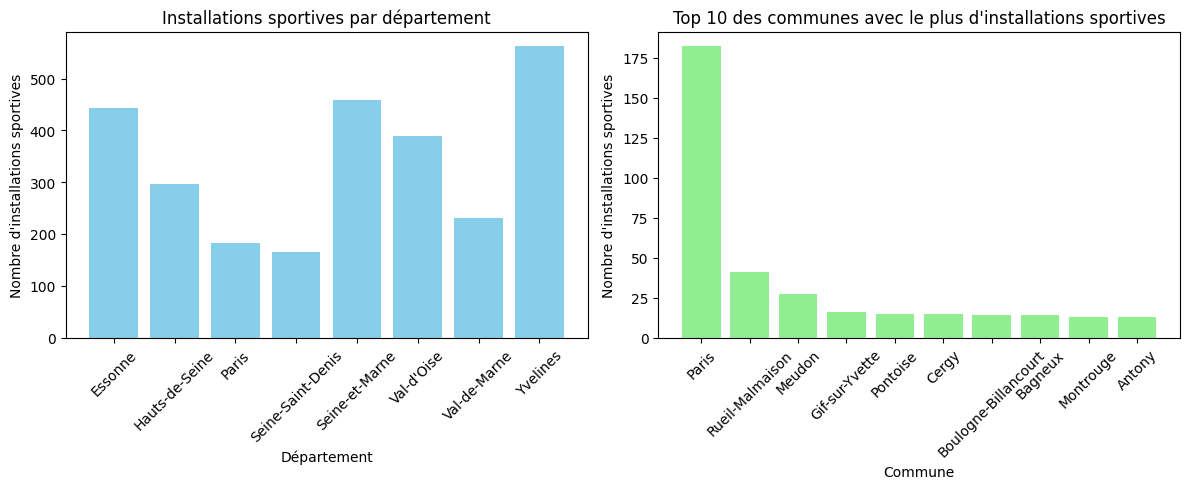

In [29]:
installations_par_departement = df_tennis_cleaned.groupby('DepLib')['InsNom'].count()
installations_par_commune = df_tennis_cleaned.groupby('ComLib')['InsNom'].count().sort_values(ascending=False)
installations_top_communes = installations_par_commune.head(10)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].bar(installations_par_departement.index, installations_par_departement.values, color='skyblue')
axes[0].set_xlabel('Département')
axes[0].set_ylabel("Nombre d'installations sportives")
axes[0].set_title('Installations sportives par département')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(installations_top_communes.index, installations_top_communes.values, color='lightgreen')
axes[1].set_xlabel('Commune')
axes[1].set_ylabel("Nombre d'installations sportives")
axes[1].set_title("Top 10 des communes avec le plus d'installations sportives")
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

2.Type des équipements et famille de type d'équipements 


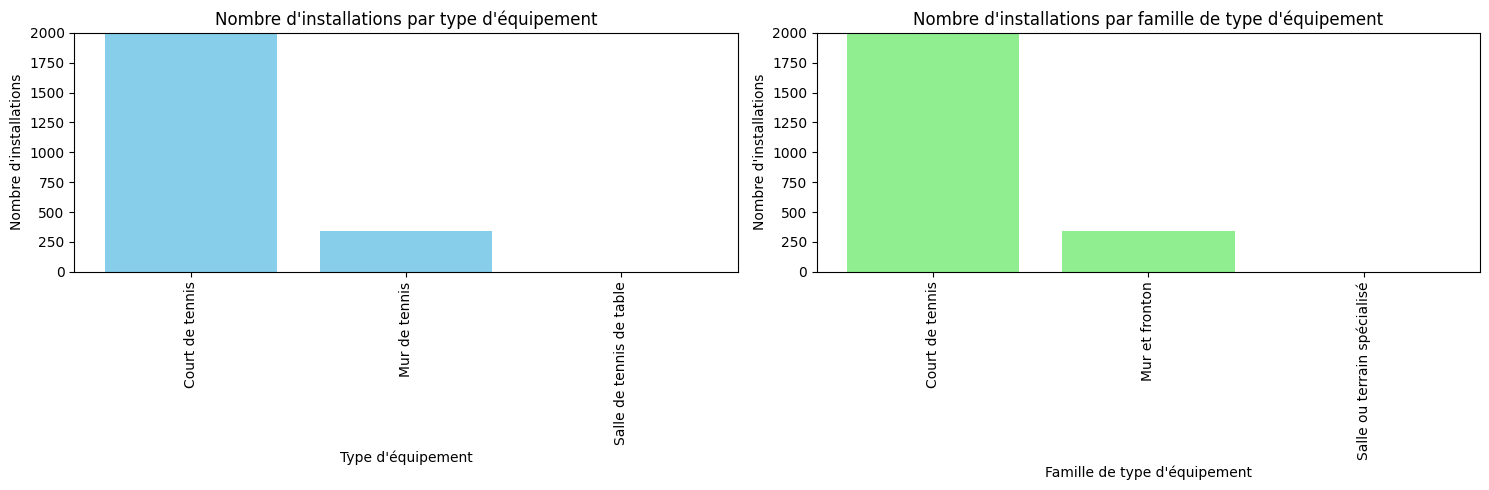

In [30]:
installations_par_type = df_tennis_cleaned.groupby('EquipementTypeLib')['InsNom'].count()
installations_par_famille = df_tennis_cleaned.groupby('Famille type d\'équipement')['InsNom'].count()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].bar(installations_par_type.index, installations_par_type.values, color='skyblue')
axes[0].set_xlabel('Type d\'équipement')
axes[0].set_ylabel('Nombre d\'installations')
axes[0].set_title('Nombre d\'installations par type d\'équipement')
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_ylim(0, 2000) 

axes[1].bar(installations_par_famille.index, installations_par_famille.values, color='lightgreen')
axes[1].set_xlabel('Famille de type d\'équipement')
axes[1].set_ylabel('Nombre d\'installations')
axes[1].set_title('Nombre d\'installations par famille de type d\'équipement')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_ylim(0, 2000) 
plt.tight_layout()
plt.show()

3. Niveau pratiqué pour chaque type d'équipement              Nature de chaque type d'équipement 
 

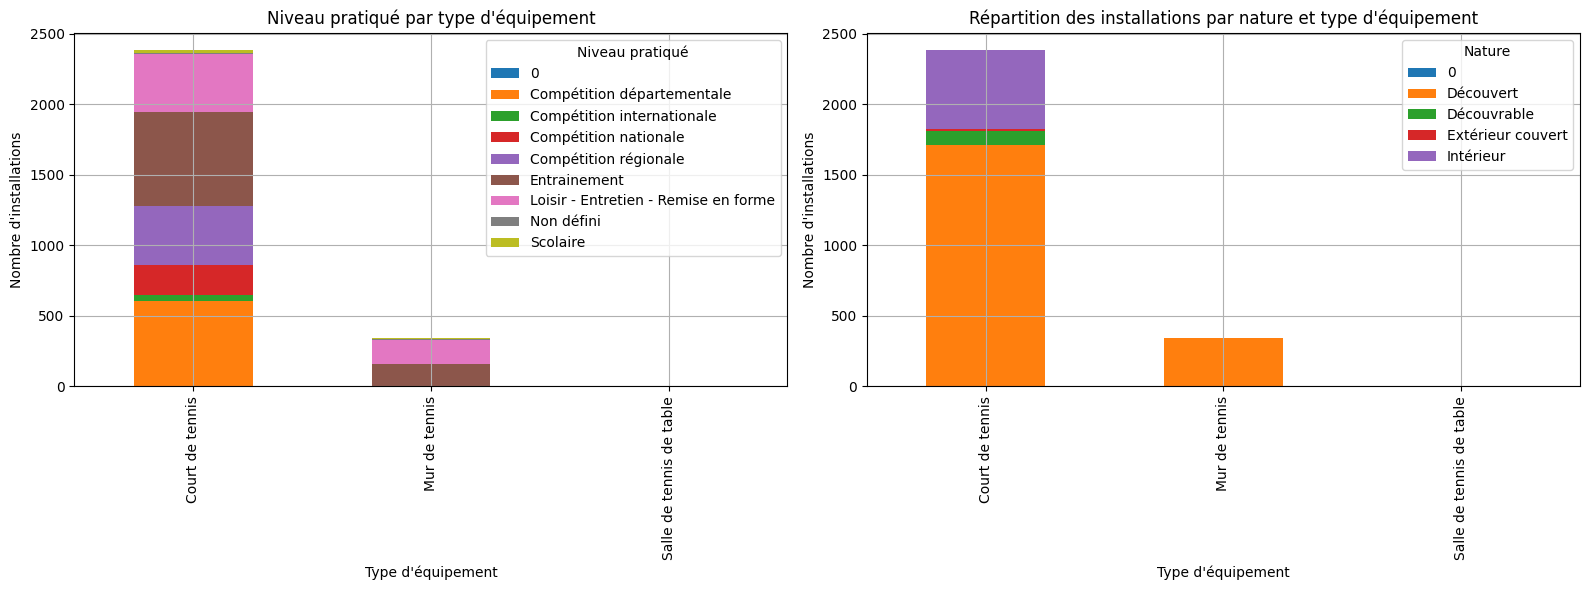

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
installations_par_niveau_type = df_tennis_cleaned.groupby(['EquipementTypeLib', 'Niveau pratiqué'])['InsNom'].count().unstack()
installations_par_niveau_type.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_xlabel('Type d\'équipement')
axes[0].set_ylabel('Nombre d\'installations')
axes[0].set_title('Niveau pratiqué par type d\'équipement')
axes[0].legend(title='Niveau pratiqué')
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(True)
nature_par_type = df_tennis_cleaned.groupby(['EquipementTypeLib', 'NatureLibelle']).size().unstack()
nature_par_type.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_xlabel('Type d\'équipement')
axes[1].set_ylabel('Nombre d\'installations')
axes[1].set_title('Répartition des installations par nature et type d\'équipement')
axes[1].legend(title='Nature')
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(True)
plt.tight_layout()
plt.show()

4. Utilisations / Utilisateurs et Type de l'installation 


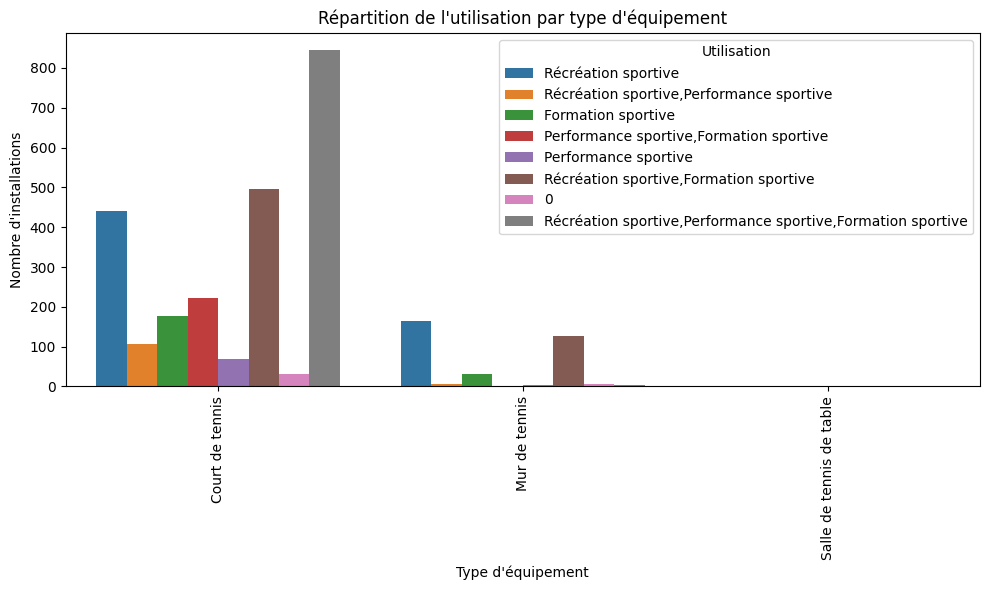

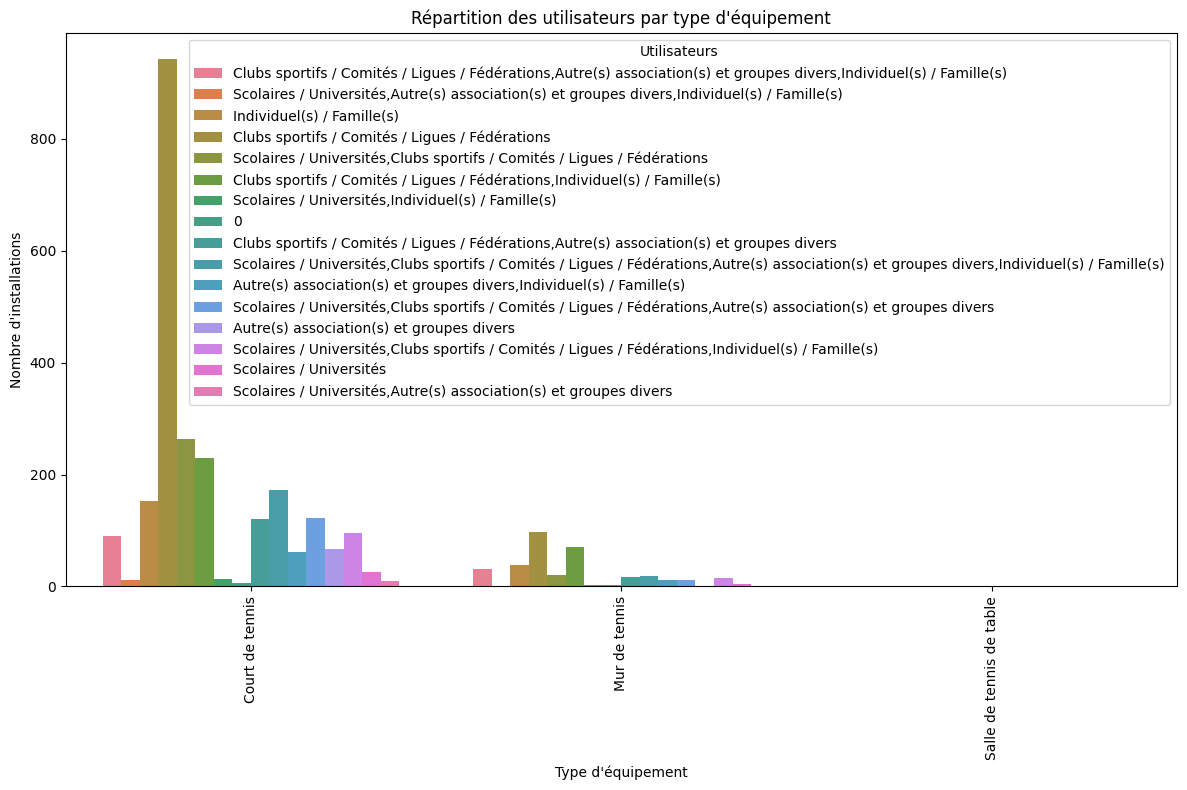

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_tennis_cleaned, x='EquipementTypeLib', hue='Utilisation')
plt.xlabel('Type d\'équipement')
plt.ylabel('Nombre d\'installations')
plt.title('Répartition de l\'utilisation par type d\'équipement')
plt.xticks(rotation=90)
plt.legend(title='Utilisation')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df_tennis_cleaned, x='EquipementTypeLib', hue='Utilisateurs')
plt.xlabel('Type d\'équipement')
plt.ylabel('Nombre d\'installations')
plt.title('Répartition des utilisateurs par type d\'équipement')
plt.xticks(rotation=90)
plt.legend(title='Utilisateurs')
plt.tight_layout()
plt.show()

------------------------------------------------------------------- Fin Dataset 1 -équipements -------------------------------------------------------------------------------------------------------

5. dataset 'data_es_nettoye' : Enquetes sur les installations sportives

In [52]:
df_es  = pd.read_excel('data_es_nettoye.xlsx')
df_ess = df_es[df_es["Nom de l'installation sportive"].str.contains('tennis', case=False, na=False)]
df_ess.head()

Nom de l'installation sportive  \
3                                TENNIS de "LETRAT"   
4                       TENNIS CLUB DU HAUT FORMANS   
7                                       TENNIS CLUB   
10  BASE DEPARTEMENTALE DE TENNIS Jean-Claude FAURE   
13                                  COURT DE TENNIS   

                         Adresse  Code Postal Commune INSEE      Commune Nom  \
3   Avenue Général ANDREA LETRAT         1100          1014           Arbent   
4              chemin du château         1480          1021  Ars-sur-Formans   
7                          CD 44         1480          1030       Beauregard   
10         456 Chemin des Gorges         1200          1033       Valserhône   
13                   Rue Tendret         1300          1034           Belley   

    Statut de la fiche d'enquête Etat de la fiche d'enquête  \
3                           True                     Validé   
4                           True                     Validé   
7                           True                     Validé   
10                          True                    Vérifié   
13                          True                     Validé   

   Date de création de la fiche d'enquête  \
3                              2005-07-03   
4                              2005-07-28   
7                              2005-07-28   
10                             2005-07-04   
13                             2012-01-02   

   Date de changement d'état de la fiche d'enquête  \
3                                       2024-04-03   
4                                       2024-04-03   
7                                       2024-04-03   
10                                      2019-11-22   
13                                      2024-04-24   

   Date de validation de la fiche d'enquête  ...  Bassin de vie Code  \
3                                2024-04-03  ...                1283   
4                                2024-04-03  ...               69264   
7                                2024-04-03  ...               69264   
10                               2017-10-04  ...                1033   
13                               2024-04-24  ...                1034   

         Bassin de vie Nom Arrondissement Code  Arrondissement Nom  \
3                  Oyonnax                  14              Nantua   
4   Villefranche-sur-Saône                  12     Bourg-en-Bresse   
7   Villefranche-sur-Saône                  12     Bourg-en-Bresse   
10              Valserhône                  14              Nantua   
13                  Belley                  11              Belley   

    Département Nom      Réctorat Nom            Région Nom Densite Niveau  \
3               Ain  Académie de Lyon  Auvergne-Rhône-Alpes              4   
4               Ain  Académie de Lyon  Auvergne-Rhône-Alpes              5   
7               Ain  Académie de Lyon  Auvergne-Rhône-Alpes              4   
10              Ain  Académie de Lyon  Auvergne-Rhône-Alpes              2   
13              Ain  Académie de Lyon  Auvergne-Rhône-Alpes              3   

                 Densite Catégorie             ZRR Simplifié  
3               Ceintures urbaines  NC - Commune non classée  
4                    Bourgs ruraux  NC - Commune non classée  
7               Ceintures urbaines  NC - Commune non classée  
10  Centres urbains intermédiaires  NC - Commune non classée  
13                  Petites villes  NC - Commune non classée  

[5 rows x 99 columns]

1. Noombre d'installations par région / Répartition des années de mise en service des installations de tennis

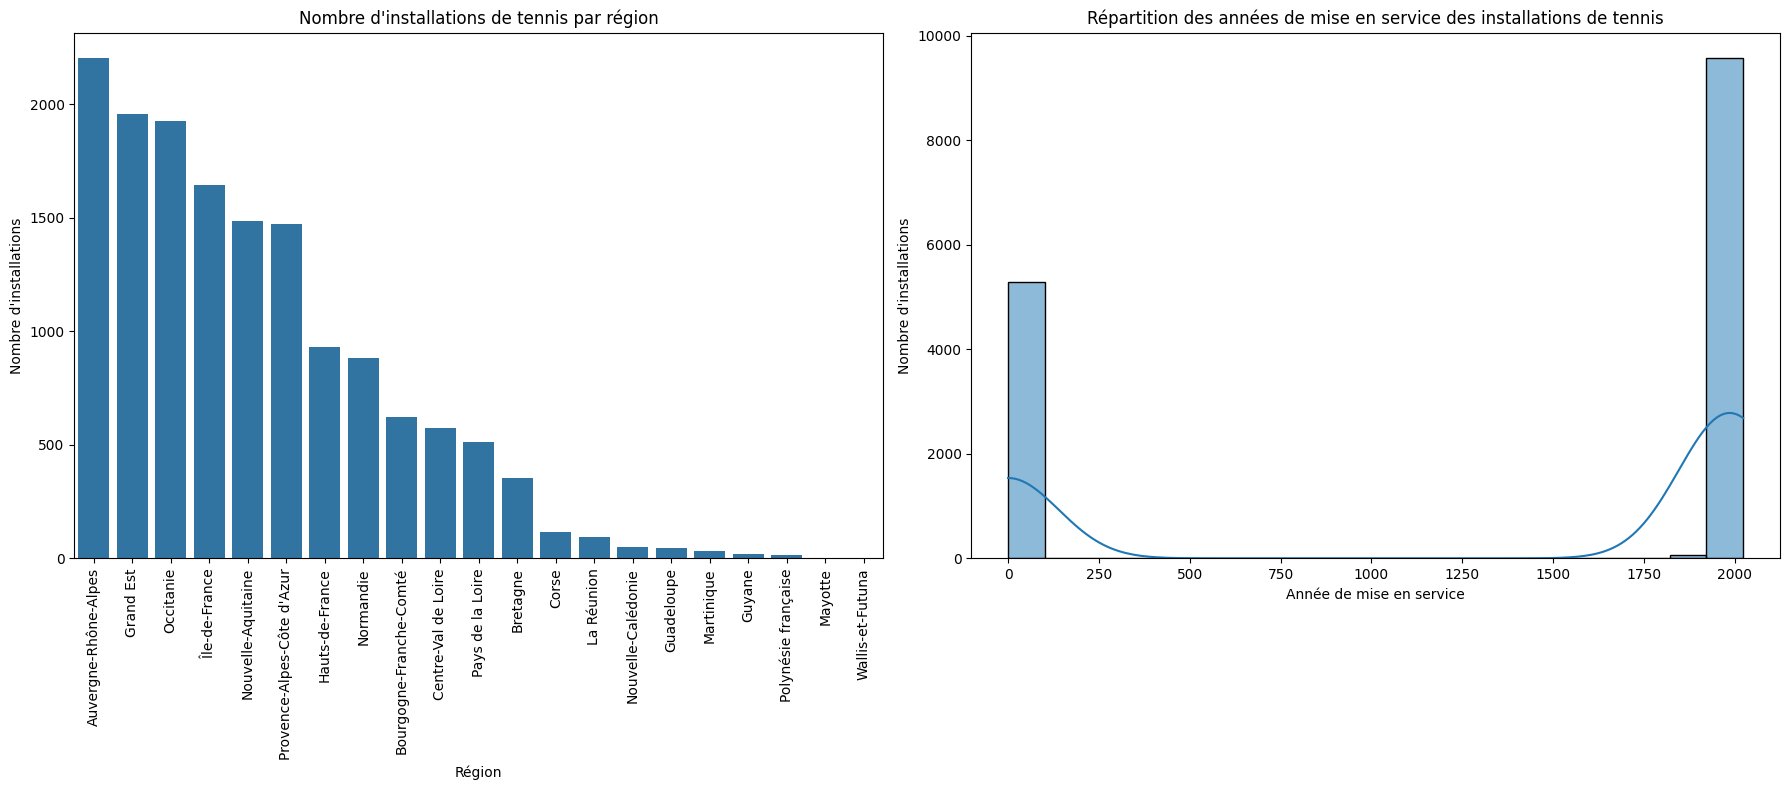

In [76]:
df_ess = df_ess[df_ess["Nom de l'installation sportive"].str.contains('tennis', case=False, na=False)]
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
sns.countplot(data=df_ess, x='Région Nom', order=df_ess['Région Nom'].value_counts().index, ax=axs[0])
axs[0].set_xlabel('Région')
axs[0].set_ylabel('Nombre d\'installations')
axs[0].set_title('Nombre d\'installations de tennis par région')
axs[0].tick_params(axis='x', rotation=90)

df_ess['Année de mise en service'] = pd.to_numeric(df_ess['Année de mise en service'], errors='coerce')
sns.histplot(data=df_ess, x='Année de mise en service', bins=20, kde=True, ax=axs[1])
axs[1].set_xlabel('Année de mise en service')
axs[1].set_ylabel('Nombre d\'installations')
axs[1].set_title('Répartition des années de mise en service des installations de tennis')
plt.tight_layout()
plt.show()

2. Nature de sol  et Types de chauffage - source d'énergie  /  type d'installation  

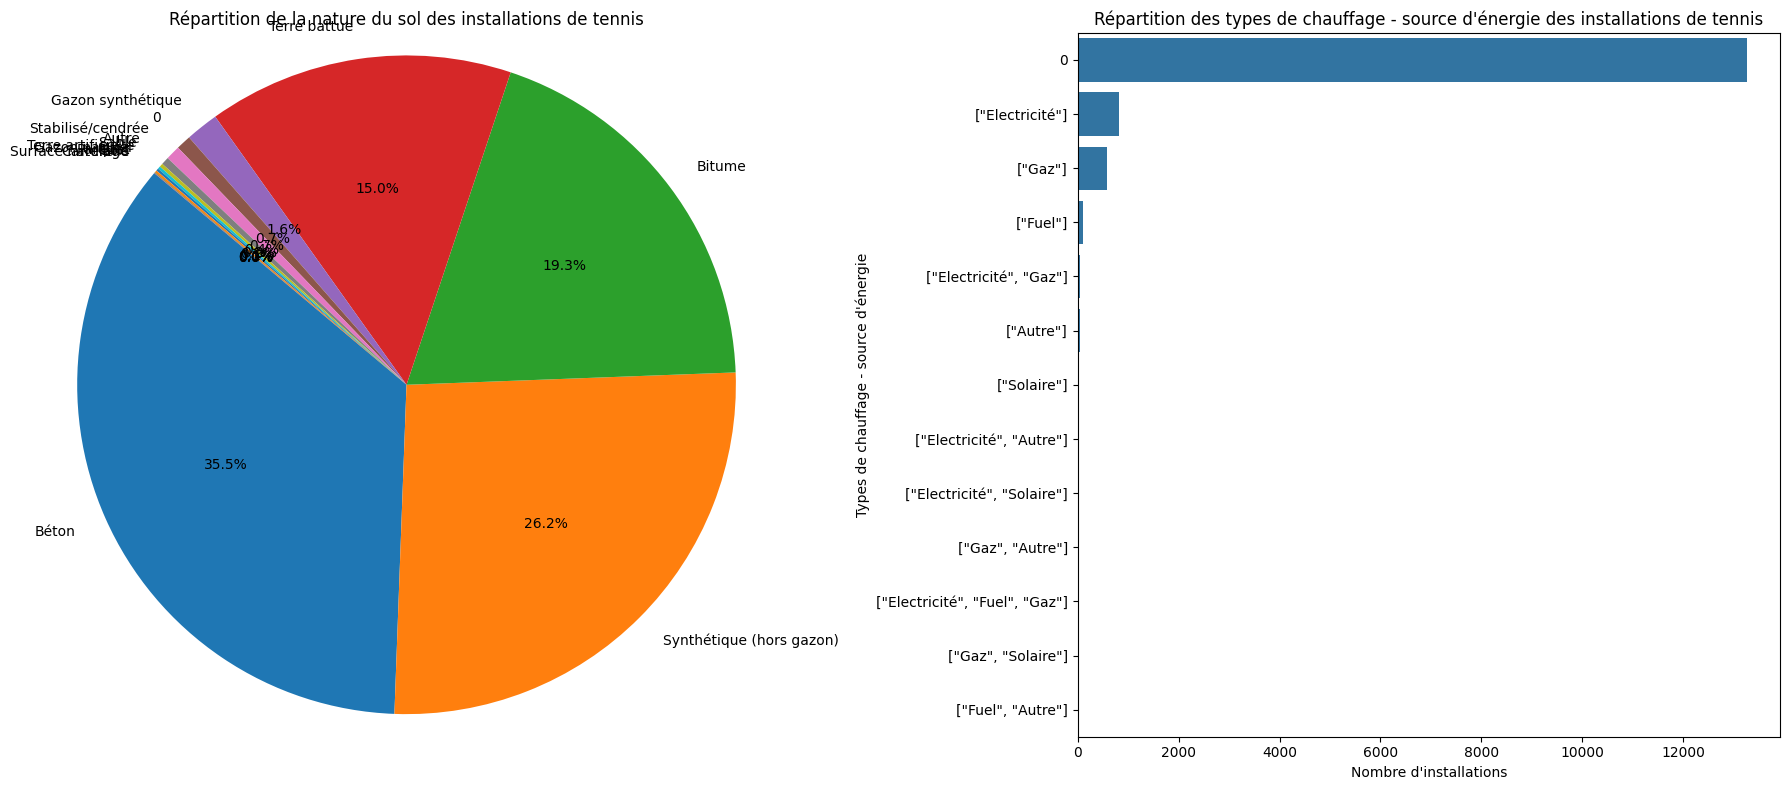

In [78]:
df_ess = df_ess[df_ess["Nom de l'installation sportive"].str.contains('tennis', case=False, na=False)]
nature_du_sol_counts = df_ess['Nature du sol'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
axs[0].pie(nature_du_sol_counts, labels=nature_du_sol_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Répartition de la nature du sol des installations de tennis')
axs[0].axis('equal')  

sns.countplot(data=df_ess, y='Types de chauffage - source d\'énergie', order=df_tennis['Types de chauffage - source d\'énergie'].value_counts().index, ax=axs[1])
axs[1].set_xlabel('Nombre d\'installations')
axs[1].set_ylabel('Types de chauffage - source d\'énergie')
axs[1].set_title('Répartition des types de chauffage - source d\'énergie des installations de tennis')
plt.tight_layout()
plt.show()

---------------------------------------------------------------------  Fin data es ---------------------------------------------------------------------------------------------------------------------------

6. Dataset ' OBJ_Bilans20152016_nettoye.xlsx' resprésentant des informations sur les balles de tennis 

In [79]:
df_balles = pd.read_excel('OBJ_Bilans20152016_nettoye.xlsx')
df_balles.head()

Annee  VilleEtape  NbBalles      Ligue TourdeFrance
0   2016      GOLBEY      7040   Lorraine         Nord
1   2016       NANCY     19200   Lorraine         Nord
2   2016        METZ     16000   Lorraine         Nord
3   2016  STRASBOURG     54400     Alsace         Nord
4   2016       REIMS     31680  Champagne         Nord

1. Nombre de balles par ligue

C:\Users\sonia\AppData\Local\Temp\ipykernel_37388\1610465068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_balles, x='Ligue', y='NbBalles', palette='magma')


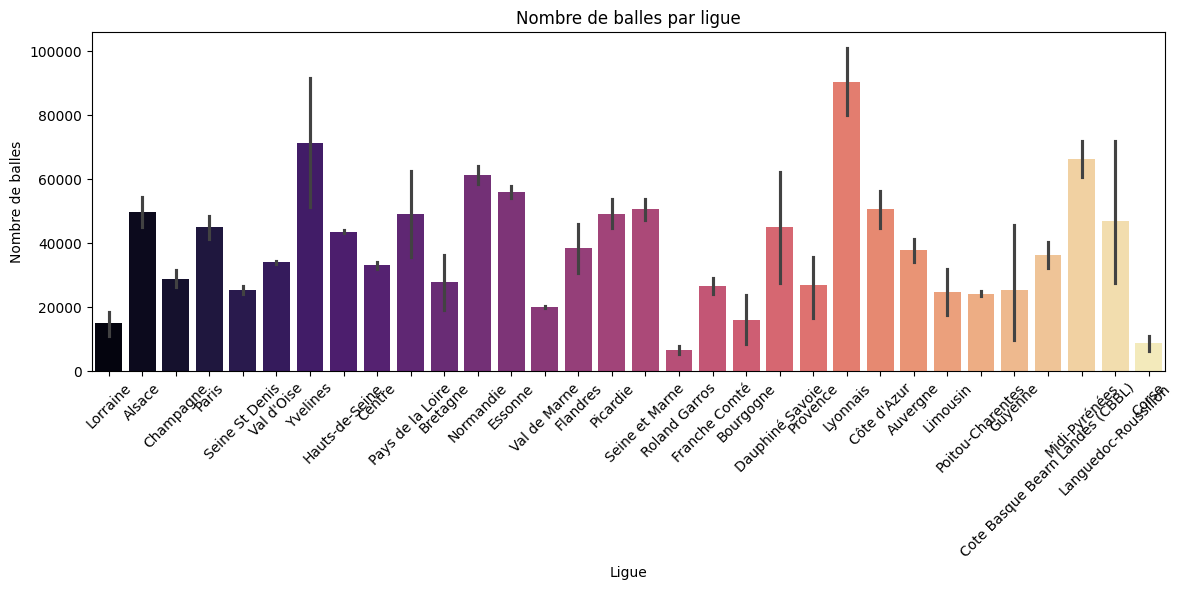

In [89]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_balles, x='Ligue', y='NbBalles', palette='magma')
plt.xlabel('Ligue')
plt.ylabel('Nombre de balles')
plt.title('Nombre de balles par ligue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nombre de balles par ville  /  Nombre de balles par région du Tour de France

C:\Users\sonia\AppData\Local\Temp\ipykernel_37388\2570951208.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_balles, x='VilleEtape', y='NbBalles', palette='viridis', ax=axs[0])
C:\Users\sonia\AppData\Local\Temp\ipykernel_37388\2570951208.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_balles, x='TourdeFrance', y='NbBalles', palette='coolwarm', ax=axs[1])


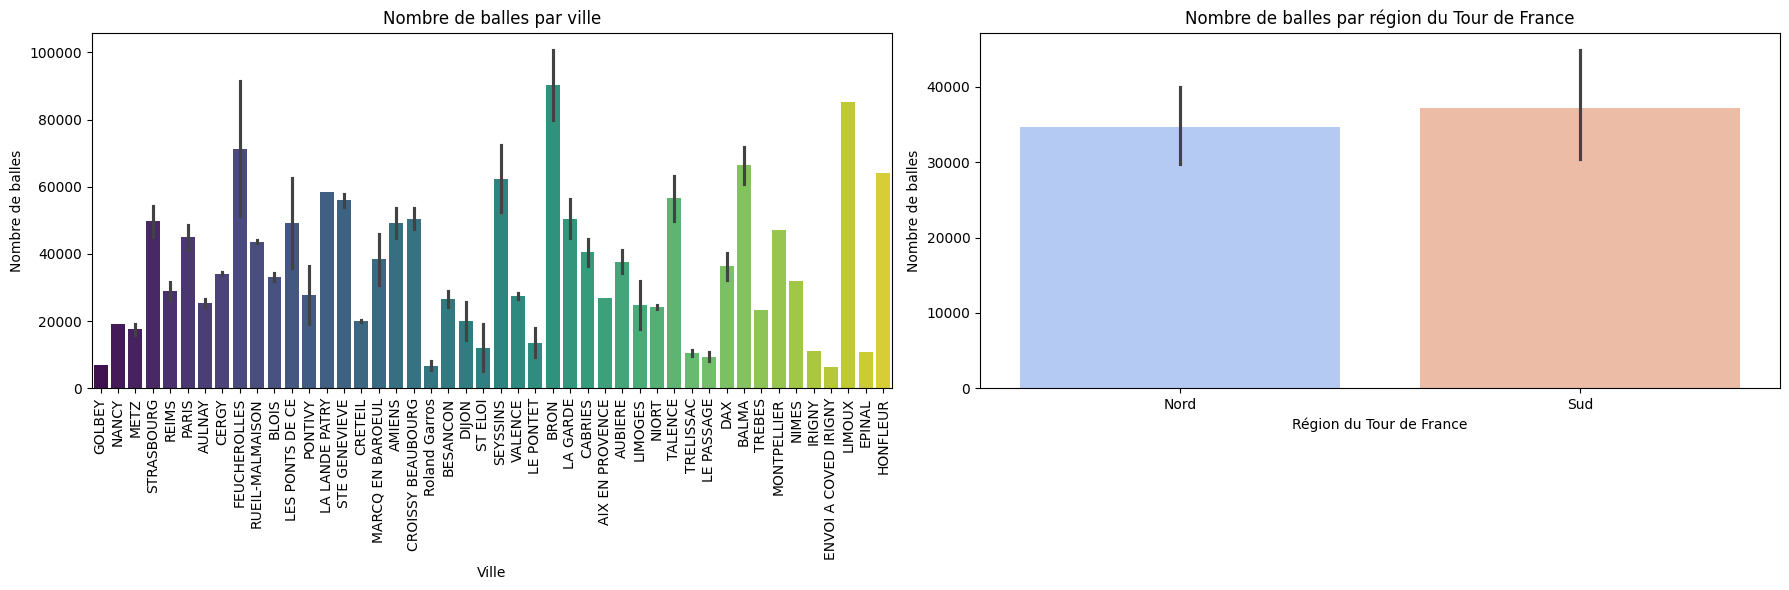

In [90]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(data=df_balles, x='VilleEtape', y='NbBalles', palette='viridis', ax=axs[0])
axs[0].set_xlabel('Ville')
axs[0].set_ylabel('Nombre de balles')
axs[0].set_title('Nombre de balles par ville')
axs[0].tick_params(axis='x', rotation=90)

sns.barplot(data=df_balles, x='TourdeFrance', y='NbBalles', palette='coolwarm', ax=axs[1])
axs[1].set_xlabel('Région du Tour de France')
axs[1].set_ylabel('Nombre de balles')
axs[1].set_title('Nombre de balles par région du Tour de France')
plt.tight_layout()
plt.show()